In [276]:
# Import necessary modules and functions

import pandas as pd # get information from files
import seaborn as sns # statistically summarizing information (for plots?)
import numpy as np # for large, multi-dimensional arrays and mathematical functions
import random

import matplotlib.pyplot as plt # a plotting library; (pyplot from python)
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats # scipy is a library for scientific computing; it imports statistical computation

# sklearn is a machine learning library:
from sklearn.preprocessing import StandardScaler # StandardScaler calculates z values
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statistics

In [277]:
KS_trainSet = pd.read_csv('KS_train_data.csv', delimiter = ',') # gets training dataset
KS_testSet = pd.read_csv('KS_test_data.csv', delimiter = ',') # gets training dataset

training_data = pd.read_csv('training_data.csv', delimiter = ',') # gets training dataset

    The kickstarter website is basically a platform where people can scroll and find businesses
    that need some support to start. As a simple user, you can choose to donate money: 1 USD or more;
    I believe most people donate 1 USD. If business reaches its goal until the pre-set deadline,
    it will be funded. If not, no user will loose his/her dollar.
    
    Each project has the following attributes that describe it (the ones with a star are also in the test set)
    (the ! symbol is the final training set):

    !*project_id = unique identifier of project
    backers_count = how many people + institutions financially support the project
    *blurb = short description of project
    !*category = theme of project; can be art, music, publishing, crafts, ...
    !*subcategory = subfield of category
    *country = country where business shall take place
    *name = name of business
    !*staff_pick = TRUE if someone from the Kickstarter.com staff likes your project (doesn't rlly help with anything)
    !*location = city in which the business is located
    !funded = TRUE or FALSE 
    *project_url = website of business
    *reward_url = website where you can donate money for this business
    
    pledged = how many people donated
    usd_pledged = how much usd was donated (usually the same as pledged, bcz most people donate 1 usd)
    converted_pledged_amount = how much money was donated (sum is here converted)
    !*goal = the minimal sum they have to reach in order to be funded
    !*currency = the currency in which the money are represented
    !*fx_rate = currency exchange rate
    
    *created_at = time when project is put on website
    !*deadline = maximum time when project should be launched
    !*launched_at = when Kickstarters.com aprove it and it's the first day you cand start receiving money

In [278]:
################################################## CLEANING DATA ##############################################################

# Create another dataset with neccesary attributes:

# df = KS_trainSet[['project_id', 'blurb', 'name', 'category', 'subcategory', 'staff_pick', 'country', 'goal', 'currency', 'fx_rate', 'launched_at', 'deadline', 'funded']]
# export_csv = df.to_csv (r'C:\ComputerScience\Year3\Period1\IntroDataScience\IntroDataScienceKickstarter\training_data.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

# There are quite a few instances that have an unknown country
# All of them use USD as currency. Therefore, we assume all these projects
# are from the US:

country_attribute = []
for i in range(len(training_data)):
    if(training_data.iloc[i].country != '?'):
        country_attribute.append(training_data.iloc[i].country)
    else:
        country_attribute.append('US')
        
training_data['final_country_attribute'] = country_attribute

Index(['project_id', 'blurb', 'name', 'category', 'subcategory', 'staff_pick',
       'country', 'goal', 'currency', 'fx_rate', 'launched_at', 'deadline',
       'funded', 'final_country_attribute'],
      dtype='object')

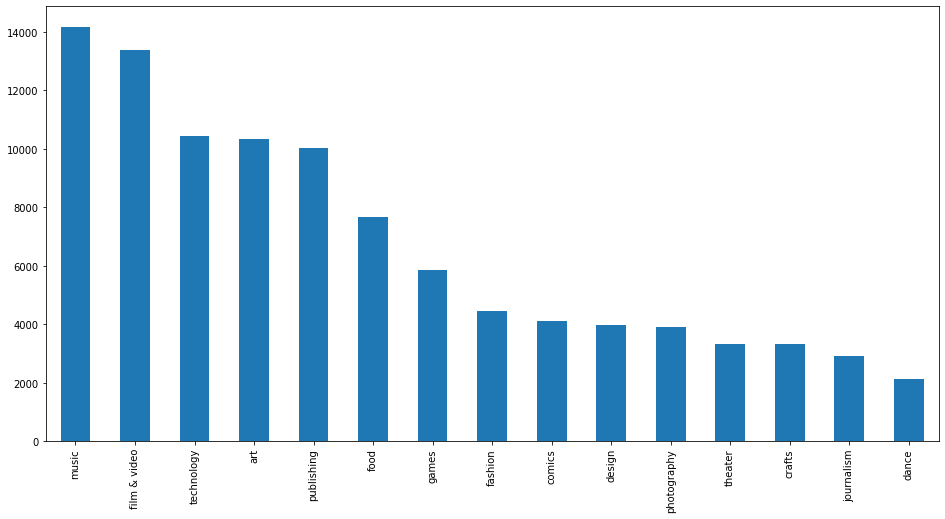

In [279]:
################################################### PICKING FEATURES ##########################################################

# 1. CATEGORY: 

training_data['category'].value_counts().plot(kind='bar')

training_data.columns

In [280]:
# This piece of code analyzes the 'category' attribute. 
# The printed vector shows the probability that, for each category, the project was picked to be funded

category_total_values = training_data['category'].value_counts()
categories = ['music', 'film & video', 'technology', 'art', 'publishing', 'food', 'games',
             'fashion', 'comics', 'design', 'photography', 'theater', 'crafts', 'journalism', 'dance']
print(categories)

category_funded = [0 for x in range(14)]

for i in range(14):
    counter = 0
    for index, row in training_data.iterrows():
        if ((row.category == categories[i]) and (row.funded == True)):
            counter += 1
    category_funded[i] = (int)((counter * 100) / category_total_values[i])
      
print(category_funded)

['music', 'film & video', 'technology', 'art', 'publishing', 'food', 'games', 'fashion', 'comics', 'design', 'photography', 'theater', 'crafts', 'journalism', 'dance']
[68, 61, 38, 55, 72, 36, 62, 44, 76, 72, 55, 75, 51, 30]


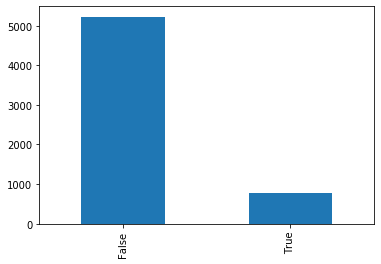

In [5]:
# 2. STAFF_PICK:

training_data['staff_pick'].value_counts().plot(kind='bar')

In [281]:
# This piece of code shows the probability of a project to be picked when it has staff_picks or not

staff_pick_total_values = training_data['staff_pick'].value_counts()
print(staff_pick_total_values)

staff_pick_funded = [0 for x in range(2)]
staff_pick_binary = []

true = 1
false = 0
counter = 0
counter2 = 0
for index, row in training_data.iterrows():
    if(row.staff_pick == True):
        staff_pick_binary.append(true)
    if(row.staff_pick == False):
        staff_pick_binary.append(false)
    if ((row.staff_pick == False) and (row.funded == True)):
        counter += 1
    if ((row.staff_pick == True) and (row.funded == True)):
        counter2 += 1
        
staff_pick_funded[0] = (int)((counter * 100) / staff_pick_total_values[0])
staff_pick_funded[1] = (int)((counter2 * 100) / staff_pick_total_values[1])
      
print(staff_pick_funded)

training_data['staff_pick_binary'] = staff_pick_binary

# Thus, 'staff_pick' can be used as a feature

False    86050
True     13950
Name: staff_pick, dtype: int64
[53, 89]


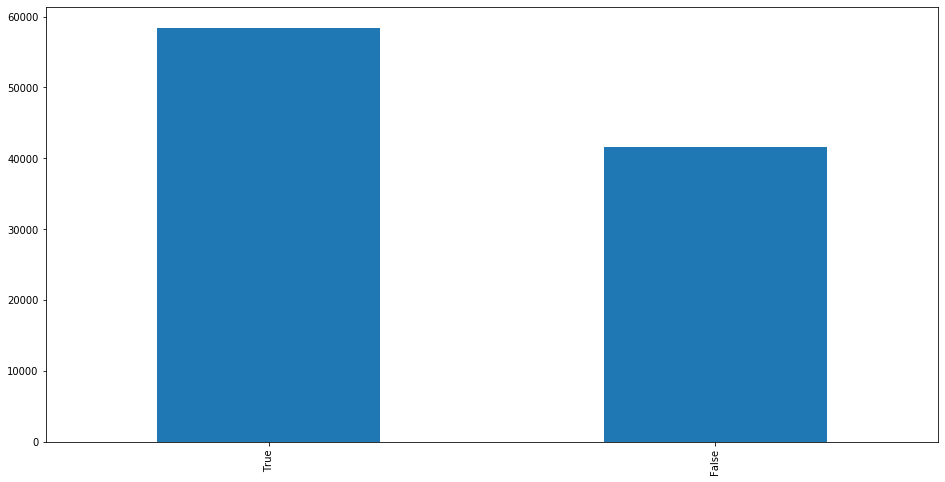

In [282]:
# 3. FUNDED:

training_data['funded'].value_counts().plot(kind='bar')

funded_binary = []

true = 1
false = 0
for index, row in training_data.iterrows():
    if(row.funded == True):
        funded_binary.append(true)
    if(row.funded == False):
        funded_binary.append(false)
        
training_data['funded_binary'] = funded_binary

In [8]:
# sns.boxplot(x = training_data.category, y = training_data.funded)

0.72 0.55 0.5 0.35 0.25 0.94 0.8 0.0 0.72 0.5 0.855 0.55 0.95 0.42000000000000004 0.98645 0.75 0.43999999999999995 0.982 0.6 0.7 0.75 0.9 0.85 0.7 0.25 0.75 0.9 0.75 0.4 0.94 0.4 0.9775 0.921079 0.9065 0.915 0.94 0.84 0.7 0.98 0.5 0.95 0.6 0.8 0.85 0.725 0.19999999999999996 0.6 0.8 0.775 0.0 0.25 0.9 0.75 0.62 0.8 0.87 0.6 0.95 0.8 0.5 0.62 0.25 0.9 0.15000000000000002 0.7257 0.9 0.86 0.8200000000000001 0.86 0.7 0.8 0.78 0.6 0.8 0.28 0.94 0.0 0.95 0.25 0.65 0.77 0.72 0.8 0.75 0.9 0.8 0.8 0.9995 0.35 0.7 0.9 0.9 0.5 0.995 0.88 0.5 0.5 0.7 0.75 0.95 0.97 0.75 0.5 0.9425 0.8 0.30000000000000004 0.7 0.965 0.25 0.75 0.95 0.95 0.8 0.995 0.945 0.6 0.925 0.6 0.7655000000000001 0.09999999999999998 0.0 0.750001 0.5 0.25 0.92 0.9 0.4 0.78 0.9 0.9 0.75 0.86 0.92 0.25 0.9 0.19999999999999996 0.96 0.9 0.79 0.9 0.9 0.9 0.19999999999999996 0.94 0.6799999999999999 0.35 0.75 0.92 0.25 0.55 0.85 0.0 0.94 0.5 0.55 0.75 0.4 0.85 0.6 0.6546000000000001 0.85 0.7 0.7 0.9634 0.7 0.7 0.9 0.725 0.9 0.85 0.9995 0

 0.7 0.25 0.94 0.25 0.0 0.25 0.7 0.25 0.25 0.4 0.25 0.25 0.25 0.63 0.6 0.0 0.0 0.6 0.25 0.25 0.55 0.25 0.25 0.985 0.25 0.85 0.25 0.25 0.95 0.9 0.4 0.25 0.85 0.8200000000000001 0.25 0.5 0.975 0.25 0.945 0.30000000000000004 0.25 0.0 0.88 0.25 0.96 0.25 0.9 0.25 0.7 0.25 0.25 0.6 0.64 0.19999999999999996 0.25 0.25 0.25 0.25 0.5 0.8 0.0 0.55 0.368 0.4 0.6 0.25 0.925 0.25 0.25 0.25 0.9667 0.5 0.9 0.95 0.955 0.15000000000000002 0.9 0.5 0.6 0.25 0.758 0.0 0.8 0.4 0.76 0.75 0.9299999999999999 0.0 0.25 0.8 0.99 0.98 0.999 0.94 0.6 0.25 0.9299999999999999 0.25 0.6 0.25 0.5 0.94 0.625 0.88 0.7 0.7 0.30000000000000004 0.25 0.75 0.71 0.6799999999999999 0.0 0.8425 0.25 0.92 0.30000000000000004 0.5 0.975 0.8 0.53 0.0 0.85 0.65 0.735 0.85 0.975 0.11119999999999997 0.6 0.75 0.25 0.25 0.25 0.44999999999999996 0.9 0.92 0.5800000000000001 0.64 0.5 0.89 0.0 0.85 0.725 0.75 0.7 0.0 0.7 0.74 0.86 9.999999999998899e-05 0.97 0.95 0.8889 0.5 0.85 0.975 0.65 0.9 0.9 0.8 0.30000000000000004 0.6891 0.5 0.677 0.7 0

 0.7 0.5 0.9 0.65 0.5 0.73 0.65 0.95 0.7 0.92 0.25 0.5841000000000001 0.85 0.7 0.900001 0.92 0.5 0.5 0.21999999999999997 0.15000000000000002 0.75 0.5 0.72 0.9 0.95 0.6 0.62 0.65 0.65 0.4 0.97 0.44999999999999996 0.95 0.4 0.97 0.74 0.25 0.5 0.25 0.25 0.050000000000000044 0.7 0.25 0.6544 0.75 0.5 0.4 0.25 0.5 0.975 0.4 0.75 0.945 0.8 0.925 0.25 0.25 0.9125 0.96 0.85 0.5 0.25 0.5 0.5 0.7 0.8 0.30000000000000004 0.0 0.35 0.30000000000000004 0.0 0.85 0.0 0.9 0.85 0.65 0.09999999999999998 0.44999999999999996 0.5 0.75 0.85 0.0 0.25 0.25 0.0 0.25 0.75 0.65 0.85 0.0 0.30000000000000004 0.25 0.25 0.7 0.25 0.785 0.25 0.75 0.25 0.35 0.0 0.25 0.844 0.6 0.65 0.44999999999999996 0.97 0.985 0.899 0.04400000000000004 0.75 0.75 0.25 0.95 0.94 0.9 0.25 0.78 0.55 0.88 0.94 0.64 0.91 0.7 0.44399999999999995 0.19999999999999996 0.98 0.9 0.8 0.6436 0.8 0.8 0.8 0.25 0.95 0.25 0.19999999999999996 0.98 0.6699999999999999 0.83 0.7 0.88 0.8 0.25 0.55 0.25 0.19999999999999996 0.7 0.85 0.9205 0.985 0.25 0.0 0.25 0.

0.961 0.7 0.9998 0.98 0.25 0.8687 0.87 0.25 0.25 0.31999999999999995 0.72 0.95 0.985 0.575 0.9299999999999999 0.9 0.25 0.6667000000000001 0.95 0.95 0.19999999999999996 0.95 0.95 0.99 0.5 0.75 0.75 0.98 0.9591 0.8 0.9875 0.8 0.6 0.7 0.982 0.9 0.85 0.2672 0.75 0.95 0.9 0.7 0.85 0.8255 0.35 0.9 0.975 0.94 0.925 0.9 0.77 0.94 0.6 0.5 0.97 0.9758 0.97 0.7 0.92 0.985 0.09999999999999998 0.995 0.9 0.92 0.995 0.94 0.75 0.55 0.998 0.45999999999999996 0.9985 0.9 0.85 0.96 0.99 0.98 0.75 0.5 0.992 0.95 0.8 0.0 0.9 0.7 0.007499999999999951 0.96 0.25 0.97 0.98 0.835 0.9 0.6 0.25 0.8 0.0 0.25 0.94 0.9299999999999999 0.5 0.44999999999999996 0.0 0.7 0.5 0.5 0.7 0.5 0.4 0.97 0.8 0.25 0.25 0.85 0.99 0.6 0.95 0.95 0.988 0.865 0.92 0.85 0.7 0.25 0.935 0.25 0.6 0.25 0.95 0.6 0.65 0.95 0.95 0.7 0.8 0.8 0.30000000000000004 0.25 0.8 0.25 0.25 0.25 0.0 0.965 0.5 0.5 0.25 0.43220000000000003 0.5 0.5 0.7 0.25 0.09999999999999998 0.7 0.25 0.6755 0.7 0.25 0.85 0.25 0.14 0.5 0.9 0.5 0.83 0.35 0.8992 0.4225 0.5 0.25

 0.945 0.25 0.0 0.25 0.85 0.25 0.25 0.94 0.5 0.8 0.25 0.8 0.25 0.5 0.25 0.975 0.19999999999999996 0.75 0.7 0.25 0.7 0.4 0.5 0.25 0.25 0.25 0.25 0.25 0.55 0.5 0.55 0.25 0.5 0.15000000000000002 0.25 0.0 0.0 0.86 0.65 0.25 0.7 0.25 0.55 0.94 0.94 0.49 0.25 0.0 0.25 0.5 0.92 0.12 0.25 0.99 0.0 0.9901 0.30000000000000004 0.5 0.25 0.6 0.30000000000000004 0.85 0.965 0.75 0.97 0.9 0.0 0.25 0.7 0.25 0.7 0.07799999999999996 0.88 0.25 0.6 0.0 0.955 0.725 0.25 0.96 0.5 0.25 0.5 0.9 0.5 0.925 0.0 0.25 0.5800000000000001 0.5 0.5 0.25 0.905 0.25 0.5 0.88 0.25 0.98 0.5 0.25 0.25 0.95 0.25 0.5 0.825 0.44999999999999996 0.91 0.91 0.050000000000000044 0.25 0.7 0.25 0.98 0.25 0.25 0.95 0.99 0.87 0.25 0.9556 0.9 0.7 0.8 0.95 0.85 0.30000000000000004 0.5 0.9 0.55 0.25 0.9125 0.9299999999999999 0.958 0.7655000000000001 0.95 0.98 0.95 0.19999999999999996 0.8445 0.95 0.55 0.95 0.65 0.25 0.9985 0.8 0.4 0.25 0.9 0.975 0.85 0.5 0.975 0.0 0.25 0.7 0.9945 0.75 0.975 0.0 0.9 0.995 0.99 0.25 0.65 0.30000000000000004 

0.95 0.95 0.64 0.95 0.38649999999999995 0.9 0.4 0.25 0.645 0.25 0.8001 0.65 0.8 0.30000000000000004 0.25 0.9 0.30000000000000004 0.855 0.75 0.35 0.835 0.9 0.65 0.91 0.6 0.44999999999999996 0.25 0.92 0.25 0.37 0.5 0.9 0.65 0.25 0.25 0.965 0.0 0.95 0.7 0.5 0.44999999999999996 0.95 0.85 0.25 0.4 0.30000000000000004 0.7 0.7 0.25 0.35 0.6 0.92 0.65 0.7 0.44999999999999996 0.55 0.5 0.94 0.5 0.65 0.945 0.09999999999999998 0.8 0.925 0.8 0.95 0.94 0.25 0.85 0.8 0.76 0.25 0.65 0.91 0.85 0.5 0.8200000000000001 0.9299999999999999 0.4 0.6699999999999999 0.7 0.95 0.55 0.9 0.7 0.62 0.7 0.25 0.09999999999999998 0.20999999999999996 0.75 0.30000000000000004 0.5001 0.65 0.7 0.92 0.8 0.7 0.8 0.5 0.7 0.25 0.8 0.945 0.94 0.65 0.69 0.925 0.8 0.5 0.88 0.95 0.0 0.25 0.965 0.9 0.4 0.85 0.65 0.85 0.95 0.95 0.25 0.9299999999999999 0.94 0.9 0.5 0.25 0.74 0.6 0.85 0.25 0.7 0.915 0.9 0.5 0.25 0.88 0.19999999999999996 0.85 0.9299999999999999 0.8200000000000001 0.9299999999999999 0.63 0.25 0.7 0.75 0.25 0.290000000000

0.5 0.9901 0.5 0.265 0.35 0.5 0.94 0.9 0.25 0.09999999999999998 0.25 0.25 0.25 0.25 0.8 0.15000000000000002 0.25 0.8 0.85 0.5963 0.25 0.25 0.25 0.25 0.35 0.95 0.95 0.25 0.7816 0.81 0.25 0.09999999999999998 0.4 0.25 0.8 0.905 0.35 0.92 0.25 0.94 0.25 0.25 0.25 0.54 0.84 0.95 0.6 0.65 0.72 0.0 0.95 0.5648 0.65 0.83 0.25 0.55 0.25 0.95 0.25 0.92 0.665 0.95 0.4 0.94 0.9901 0.98 0.5254 0.25 0.30000000000000004 0.25 0.75 0.0 0.9 0.9 0.86 0.25 0.95 0.65 0.25 0.25 0.5 0.89 0.95 0.25 0.9 0.25 0.76 0.8 0.95 0.825 0.94 0.65 0.25 0.9299999999999999 0.33999999999999997 0.8 0.87 0.84 0.65 0.775 0.94 0.25 0.95 0.4 0.7 0.25 0.85 0.25 0.8 0.77 0.25 0.5 0.7 0.95 0.4 0.9 0.6699999999999999 0.78 0.25 0.0 0.835 0.65 0.25 0.44999999999999996 0.5 0.95 0.85 0.8 0.8 0.5 0.09999999999999998 0.88 0.5 0.98 0.8 0.9 0.7 0.25 0.25 0.30000000000000004 0.28 0.10999999999999999 0.99 0.85 0.8 0.6 0.85 0.94 0.925 0.5 0.0 0.85 0.8 0.85 0.8 0.25 0.25 0.8048 0.85 0.5 0.0 0.75 0.9 0.5 0.75 0.7 0.95 0.5 0.9299999999999999 0.7

0.875 0.96 0.95 0.88 0.25 0.6 0.5 0.98 0.83 0.955 0.5 0.30000000000000004 0.95 0.979 0.5 0.85 0.9 0.943 0.9 0.25 0.25 0.98 0.05400000000000005 0.9 0.8 0.0 0.25 0.25 0.5 0.0 0.75 0.25 0.78 0.25 0.19999999999999996 0.0 0.0 0.4 0.8 0.5 0.5 0.8 0.94 0.5 0.8 0.25 0.25 0.85 0.25 0.25 0.75 0.96 0.95 0.5 0.25 0.25 0.75 0.9299999999999999 0.8 0.0 0.25 0.25 0.7 0.43999999999999995 0.6667000000000001 0.998 0.44999999999999996 0.8012 0.25 0.55 0.9 0.7 0.9299999999999999 0.5 0.25 0.88 0.25 0.95 0.0 0.25 0.25 0.0 0.25 0.35 0.725 0.88 0.5 0.7 0.25 0.85 0.5 0.25 0.25 0.7 0.5 0.65 0.0 0.55 0.25 0.5 0.9 0.9 0.905 0.95 0.525 0.25 0.4 0.0 0.25 0.06740000000000002 0.7 0.02200000000000002 0.7 0.16690000000000005 0.25 0.25 0.5 0.25 0.965 0.345 0.25 0.55 0.925 0.25 0.975 0.96 0.37250000000000005 0.75 0.95 0.94 0.30000000000000004 0.25 0.98 0.25 0.4 0.25 0.25 0.25 0.25 0.9 0.25 0.8 0.5 0.0 0.0 0.0 0.25 0.88 0.8 0.5 0.7 0.7 0.8 0.5 0.25 0.25 0.75 0.25 0.0 0.4 0.25 0.25 0.8945 0.85 0.25 0.95 0.25 0.8 0.0 0.25 0.

0.7 0.945 0.85 0.25 0.25 0.8 0.25 0.75 0.22999999999999998 0.999 0.89 0.975 0.85 0.955 0.955 0.9 0.945 0.30000000000000004 0.92 0.97 0.983 0.65 0.15000000000000002 0.9985 0.89 0.98 0.94 0.85 0.8200000000000001 0.98 0.99 0.974 0.999 0.9825 0.95 0.0 0.9975 0.999 0.94 0.955 0.98 0.8 0.99 0.25 0.95 0.95 0.995 0.79 0.9992 0.995 0.999 0.94 0.95 0.985 0.9925 0.998 0.997 0.955 0.95 0.9 0.75 0.85 0.99 0.999 0.95 0.8 0.998 0.975 0.9999 0.98 0.55 0.9 0.995 0.975 0.925 0.99 0.95 0.8 0.9905 0.99 0.85 0.945 0.75 0.98 0.97 0.92 0.9725 0.8275 0.9 0.825 0.999 0.825 0.0 0.945 0.95 0.15000000000000002 0.0 0.75 0.98 0.25 0.95 0.25 0.75 0.0 0.88 0.9725 0.95 0.55 0.09999999999999998 0.7 0.5 0.965 0.8 0.84 0.94 0.95 0.95 0.75 0.9 0.65 0.9 0.985 0.985 0.975 0.36229999999999996 0.9 0.75 0.965 0.99 0.7 0.935 0.0 0.95 0.0 0.75 0.7 0.25 0.97 0.95 0.96 0.8835999999999999 0.95 0.6 0.9 0.96 0.7 0.95 0.95 0.25 0.95 0.965 0.739 0.25 0.9875 0.8 0.95 0.85 0.9 0.98 0.5 0.25 0.95 0.7 0.95 0.88 0.85 0.88 0.975 0.92 0.4 0.0

0.88 0.85 0.55 0.79 0.9975 0.9825 0.19999999999999996 0.9978 0.4 0.7 0.62 0.19999999999999996 0.98 0.0 0.54 0.8 0.65 0.9 0.975 0.25 0.96 0.25 0.25 0.75 0.0 0.95 0.975 0.30000000000000004 0.25 0.999 0.25 0.7 0.25 0.83 0.984 0.9 0.9 0.19999999999999996 0.735 0.96 0.25 0.8 0.5 0.92 0.78 0.5 0.89 0.98 0.30000000000000004 0.9515 0.91 0.9925 0.4 0.5 0.25 0.21999999999999997 0.41100000000000003 0.5 0.7 0.25 0.95 0.25 0.7 0.97 0.25 0.5 0.75 0.99 0.25 0.955 0.92 0.5 0.98 0.0 0.75 0.35 0.5 0.25 0.85 0.0 0.65 0.8200000000000001 0.91 0.25 0.955 0.25 0.9 0.0 0.95 0.8 0.25 0.19999999999999996 0.8 0.09999999999999998 0.9 0.95 0.965 0.9998 0.873 0.97 0.999 0.76 0.8115 0.95 0.998 0.55 0.8 0.925 0.975 0.95 0.975 0.92 0.85 0.8 0.25 0.0 0.25 0.0 0.9 0.9 0.4 0.9 0.25 0.25 0.25 0.8 0.955 0.8 0.9 0.25 0.95 0.19999999999999996 0.5 0.25 0.25 0.25 0.25 0.25 0.65 0.96 0.9 0.7 0.8 0.975 0.95 0.998 0.983 0.95 0.6 0.22750000000000004 0.25 0.0 0.75 0.95 0.8 0.5 0.78 0.92 0.7 0.5 0.75 0.9875 0.25 0.7 0.835 0.19999999

 0.55 0.0 0.5 0.25 0.5 0.5 0.25 0.25 0.30000000000000004 0.25 0.25 0.98 0.25 0.65 0.25 0.0 0.75 0.65 0.94 0.5 0.5 0.25 0.25 0.8 0.25 0.8 0.85 0.25 0.25 0.5 0.25 0.25 0.95 0.25 0.25 0.25 0.0 0.9 0.25 0.9 0.65 0.25 0.30000000000000004 0.9 0.7 0.5 0.0 0.7 0.0 0.30000000000000004 0.09999999999999998 0.95 0.25 0.020000000000000018 0.5 0.75 0.75 0.25 0.25 0.25 0.75 0.25 0.9 0.96 0.25 0.25 0.96 0.25 0.25 0.25 0.6799999999999999 0.85 0.5 0.0 0.030000000000000027 0.0 0.25 0.6 0.30000000000000004 0.31000000000000005 0.25 0.0 0.5 0.9 0.8 0.0 0.30000000000000004 0.0 0.8 0.985 0.55 0.6 0.5 0.6 0.25 0.77 0.7 0.95 0.92355 0.5 0.8 0.25 0.25 0.74 0.25 0.19999999999999996 0.8 0.25 0.77 0.55 0.75 0.25 0.9 0.0 0.5 0.5 0.25 0.9975 0.5 0.75 0.8 0.22299999999999998 0.95 0.5 0.0 0.30000000000000004 0.25 0.25 0.25 0.0 0.825 0.0 0.25 0.0 0.9825 0.25 0.7 0.0 0.25 0.19999999999999996 0.85 0.25 0.25 0.7 0.5 0.9865 0.9575 0.25 0.9975 0.0 0.9975 0.5 0.8 0.25 0.25 0.25 0.91 0.99 0.09999999999999998 0.0 0.8 0.75 0.75 

 0.65 0.875 0.9 0.5 0.95 0.25 0.65 0.925 0.30000000000000004 0.5 0.95 0.7 0.6 0.8 0.6334 0.95 0.9 0.9 0.5 0.7 0.994 0.825 0.995 0.5 0.95 0.95 0.8 0.995 0.91 0.99 0.9975 0.25 0.85 0.9975 0.9575 0.965 0.20999999999999996 0.6 0.9975 0.7 0.9975 0.9299999999999999 0.9299999999999999 0.995 0.6599999999999999 0.98 0.9 0.735 0.8132 0.78 0.7 0.88 0.88 0.96 0.95 0.88 0.6 0.7 0.8 0.5 0.25 0.75 0.25 0.6005 0.8275 0.6799999999999999 0.7659 0.25 0.5 0.25 0.25 0.25 0.5 0.25 0.65 0.0 0.30000000000000004 0.0 0.25 0.7 0.7 0.7705 0.25 0.25 0.5 0.9 0.75 0.95 0.85 0.995 0.7 0.6667000000000001 0.25 0.25 0.44999999999999996 0.25 0.19999999999999996 0.25 0.25 0.6 0.25 0.25 0.85 0.7 0.25 0.7414000000000001 0.9 0.25 0.16000000000000003 0.25 0.25 0.0 0.25 0.0 0.25 0.25 0.25 0.25 0.25 0.25 0.5 0.8200000000000001 0.5 0.25 0.25 0.21999999999999997 0.9437 0.25 0.25 0.25 0.25 0.25 0.25 0.9 0.25 0.65 0.25 0.25 0.25 0.25 0.25 0.5 0.25 0.25 0.94 0.25 0.25 0.4 0.25 0.5 0.25 0.25 0.25 0.8 0.75 0.25 0.0 0.0 0.25 0.0 0.25 0

0.25 0.7 0.79 0.71 0.25 0.25 0.38 0.5 0.9 0.25 0.76 0.25 0.7 0.0 0.25 0.25 0.955 0.25 0.85 0.4 0.25 0.5 0.5 0.25 0.65 0.4679 0.09999999999999998 0.25 0.25 0.30000000000000004 0.25 0.25 0.25 0.975 0.9 0.25 0.25 0.25 0.25 0.25 0.965 0.25 0.825 0.25 0.25 0.25 0.25 0.5 0.5 0.5 0.0 0.25 0.25 0.9 0.31499999999999995 0.5 0.30000000000000004 0.25 0.25 0.25 0.0 0.30000000000000004 0.25 0.25 0.25 0.25 0.25 0.9 0.25 0.25 0.25 0.25 0.25 0.0 0.25 0.19999999999999996 0.0 0.0 0.25 0.5 0.0 0.5 0.5 0.0 0.44999999999999996 0.25 0.25 0.25 0.25 0.0 0.25 0.94 0.5 0.97 0.5 0.30000000000000004 0.25 0.0 0.0 0.25 0.25 0.5 0.25 0.0 0.9 0.65 0.5 0.25 0.25 0.25 0.25 0.25 0.7 0.30000000000000004 0.6 0.25 0.7 0.5 0.25 0.020000000000000018 0.75 0.25 0.25 0.30000000000000004 0.25 0.25 0.25 0.95 0.030000000000000027 0.0 0.25 0.30000000000000004 0.25 0.25 0.25 0.6799999999999999 0.5 0.95 0.30000000000000004 0.25 0.0 0.25 0.0 0.55 0.5 0.5 0.5 0.81 0.25 0.25 0.6699999999999999 0.19999999999999996 0.25 0.75 0.92355 0.8 0.

0.8 0.0 0.5 0.25 0.25 0.9 0.09999999999999998 0.19999999999999996 0.0 0.8 0.8 0.6 0.55 0.5 0.9 0.5 0.0 0.0 0.65 0.5 0.7 0.6 0.9 0.9 0.5 0.0 0.25 0.5 0.30000000000000004 0.0 0.962773 0.8 0.975 0.25 0.95 0.75 0.7 0.25 0.25 0.5 0.9 0.8 0.87 0.0 0.25 0.25 0.5 0.775 0.7 0.5 0.8 0.88 0.85 0.99 0.945 0.5 0.8 0.955 0.7 0.09999999999999998 0.7 0.7 0.9 0.525 0.30000000000000004 0.25 0.9 0.35 0.9 0.25 0.0 0.88 0.25 0.75 0.0 0.0 0.25 0.25 0.5 0.85 0.7 0.0 0.4 0.95 0.8 0.8 0.25 0.5 0.349901 0.5 0.5 0.77 0.8 0.85 0.9 0.8 0.9973 0.8 0.8 0.88 0.95 0.5 0.4 0.9775 0.5 0.995 0.75 0.0 0.19999999999999996 0.8 0.14 0.725 0.7 0.88 0.95 0.8 0.5 0.4 0.25 0.95 0.63 0.925 0.8 0.9 0.0 0.4 0.25 0.25 0.0 0.825 0.7 0.72 0.30000000000000004 0.75 0.25 0.37749999999999995 0.75 0.9 0.25 0.25 0.85 0.7 0.25 0.8 0.75 0.44999999999999996 0.86 0.0 0.85 0.88 0.75 0.5 0.0 0.95 0.6 0.85 0.7 0.5 0.7 0.8 0.5 0.28 0.92 0.6 0.0 0.975 0.5 0.9 0.94 0.4 0.25 0.30000000000000004 0.6799999999999999 0.0 0.56 0.92 0.25 0.25 0.25 0.65 0.0 

 0.4 0.95 0.95 0.65 0.5 0.8 0.8 0.4 0.25 0.9 0.25 0.0 0.95 0.25 0.8 0.8 0.9 0.5 0.45399999999999996 0.9945 0.25 0.5 0.8 0.75 0.9 0.25 0.25 0.25 0.09999999999999998 0.7 0.95 0.25 0.5 0.74 0.9 0.5 0.8 0.25 0.8 0.77 0.25 0.95 0.25 0.5 0.95 0.25 0.19779999999999998 0.85 0.25 0.25 0.97 0.9 0.09999999999999998 0.8 0.5700000000000001 0.55 0.9 0.75 0.88 0.25 0.0 0.968 0.915 0.98 0.7 0.85 0.25 0.64 0.95 0.55 0.65 0.9299999999999999 0.0 0.94 0.95 0.8 0.475 0.5 0.25 0.97 0.25 0.925 0.8 0.7 0.25 0.0 0.0 0.52 0.5 0.7 0.85 0.95 0.95 0.5 0.44999999999999996 0.5 0.95 0.77 0.5 0.95 0.7 0.35 0.7 0.9 0.55 0.9612 0.477 0.8 0.25 0.7 0.0 0.98 0.25 0.5 0.30000000000000004 0.9 0.25 0.85 0.25 0.25 0.19999999999999996 0.99 0.6 0.85 0.25 0.5 0.25 0.5 0.985 0.95 0.0 0.5 0.25 0.9 0.4 0.4 0.5 0.98 0.85 0.25 0.79 0.94 0.30000000000000004 0.25 0.25 0.7 0.75 0.25 0.25 0.9 0.7 0.30000000000000004 0.9 0.9 0.25 0.905 0.75 0.9 0.0 0.65 0.25 0.95 0.7 0.83 0.95 0.25 0.8 0.25 0.25 0.85 0.25 0.85 0.09999999999999998 0.6 0.25 

0.5 0.0 0.25 0.25 0.25 0.725 0.5 0.25 0.25 0.25 0.07499999999999996 0.25 0.4 0.44999999999999996 0.25 0.8 0.25 0.25 0.25 0.25 0.6 0.25 0.5 0.95 0.25 0.0 0.94 0.25 0.95 0.25 0.25 0.6 0.25 0.6 0.65 0.25 0.14 0.7 0.75 0.25 0.0 0.25 0.85 0.25 0.9 0.25 0.25 0.88 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.49 0.25 0.8 0.19999999999999996 0.19999999999999996 0.25 0.61 0.20609999999999995 0.25 0.30000000000000004 0.5 0.25 0.25 0.25 0.84 0.25 0.6 0.25 0.8 0.405 0.25 0.5 0.25 0.993 0.25 0.6 0.22499999999999998 0.25 0.5 0.25 0.7 0.25 0.9 0.5 0.65 0.25 0.75 0.25 0.25 0.0 0.6 0.945 0.25 0.0 0.25 0.72 0.25 0.30000000000000004 0.25 0.25 0.7 0.8 0.25 0.25 0.25 0.8 0.25 0.5 0.25 0.25 0.85 0.25 0.75 0.25 0.25 0.5 0.69 0.5 0.050000000000000044 0.25 0.85 0.975 0.4 0.25 0.85 0.25 0.19999999999999996 0.25 0.25 0.95 0.25 0.55 0.25 0.25 0.25 0.0 0.25 0.5 0.88 0.25 0.25 0.5 0.25 0.25 0.050000000000000044 0.7 0.4 0.4 0.9 0.25 0.25 0.0 0.0 0.25 0.25 0.25 0.25 0.25 0.5800000000000001 0.25 0.25 0.25 0.6 0.25 0.

 0.935 0.6 0.9 0.25 0.25 0.55 0.25 0.5 0.8 0.5 0.25 0.5 0.7 0.75 0.0 0.75 0.5 0.5 0.25 0.5 0.0 0.0 0.56 0.92 0.25 0.65 0.0 0.25 0.19999999999999996 0.5 0.9 0.75 0.5 0.0 0.5 0.5 0.25 0.95 0.6 0.9 0.52 0.25 0.35 0.0 0.25 0.0 0.0 0.75 0.25 0.55 0.0 0.0 0.25 0.85 0.6 0.5 0.5 0.0 0.25 0.75 0.79 0.25 0.5 0.75 0.35 0.25 0.65 0.25 0.73 0.65 0.9 0.25 0.725 0.725 0.25 0.75 0.87 0.0 0.5 0.5 0.7 0.25 0.9 0.09999999999999998 0.5 0.35 0.8 0.9 0.5 0.25 0.858 0.4 0.25 0.75 0.25 0.0 0.8 0.0 0.25 0.8 0.92 0.0 0.25 0.75 0.75 0.7 0.8 0.25 0.30000000000000004 0.925 0.75 0.0 0.7 0.5 0.5 0.0 0.25 0.25 0.7 0.5 0.75 0.6 0.7 0.75 0.5 0.25 0.35 0.5 0.0 0.81 0.85 0.36 0.95 0.7 0.5 0.0 0.4 0.19999999999999996 0.92 0.30000000000000004 0.25 0.75 0.4 0.25 0.25 0.75 0.0 0.4 0.6 0.4 0.8 0.8 0.8 0.5 0.5 0.75 0.7 0.95 0.0 0.75 0.09999999999999998 0.25 0.25 0.0 0.15500000000000003 0.5 0.5 0.0 0.8 0.25 0.55 0.4 0.25 0.7 0.25 0.5 0.5 0.30000000000000004 0.09999999999999998 0.19999999999999996 0.5 0.5 0.9 0.4 0.5 0.0 0.09999

 0.25 0.0 0.91 0.25 0.25 0.75 0.5598000000000001 0.97 0.7 0.5 0.4 0.5 0.6 0.65 0.94 0.25 0.15000000000000002 0.0 0.0 0.9 0.25 0.0 0.6 0.96 0.8 0.8 0.25 0.9 0.55 0.5 0.65 0.25 0.06000000000000005 0.7 0.25 0.25 0.35 0.9299999999999999 0.25 0.44999999999999996 0.7 0.25 0.25 0.25 0.15000000000000002 0.5 0.25 0.99 0.25 0.25 0.25 0.5 0.8 0.25 0.0 0.25 0.75 0.5700000000000001 0.25 0.25 0.76 0.0 0.25 0.65 0.25 0.25 0.7 0.25 0.25 0.5 0.97 0.19999999999999996 0.974 0.91 9.999999999998899e-05 0.25 0.43999999999999995 0.25 0.30000000000000004 0.8 0.0 0.95 0.25 0.685 0.25 0.25 0.0 0.25 0.88 0.5 0.35 0.30000000000000004 0.25 0.25 0.25 0.915 0.95 0.0 0.4 0.25 0.525 0.84 0.94 0.25 0.25 0.25 0.25 0.25 0.7 0.5 0.44999999999999996 0.0 0.6 0.19999999999999996 0.25 0.98 0.9 0.63 0.25 0.4 0.25 0.8375 0.4 0.19999999999999996 0.6 0.91 0.4 0.19999999999999996 0.25 0.65 0.25 0.92 0.25 0.25 0.25 0.25 0.25 0.25 0.0 0.25 0.30000000000000004 0.19999999999999996 0.5 0.44999999999999996 0.25 0.0 0.7 0.099999999999999

 0.25 0.8 0.7 0.5 0.050000000000000044 0.25 0.85 0.95 0.15000000000000002 0.25 0.9 0.0 0.7 0.0 0.92 0.25 0.15000000000000002 0.25 0.775 0.75 0.0 0.4 0.985 0.25 0.9 0.73 0.895 0.78 0.75 0.9 0.5255000000000001 0.75 0.0 0.7 0.6 0.92 0.7155 0.25 0.7 0.25 0.85 0.95 0.97 0.8 0.25 0.25 0.5 0.19999999999999996 0.923 0.96 0.7 0.7 0.88 0.88 0.7 0.25 0.7 0.25 0.8200000000000001 0.96 0.7 0.97 0.0 0.5 0.0 0.5 0.09999999999999998 0.575 0.0 0.25 0.75 0.75 0.25 0.25 0.4 0.19999999999999996 0.25 0.4 0.25 0.6 0.8 0.8 0.0 0.25 0.25 0.8 0.25 0.25 0.0 0.5 0.7 0.25 0.25 0.7 0.7 0.65 0.25 0.9999 0.25 0.6 0.25 0.25 0.9 0.25 0.25 0.25 0.0 0.25 0.97 0.25 0.921 0.25 0.7 0.25 0.9 0.995 0.25 0.65 0.25 0.0 0.5 0.73 0.30000000000000004 0.25 0.25 0.999 0.4 0.94 0.44999999999999996 0.725 0.0 0.25 0.25 0.65 0.7 0.25 0.30000000000000004 0.0 0.25 0.5 0.75 0.0 0.9 0.89 0.0 0.8 0.85 0.75 0.25 0.85 0.0 0.25 0.89 0.937 0.25 0.96 0.25 0.0 0.17000000000000004 0.0 0.25 0.7 0.5 0.25 0.7 0.7 0.62 0.35 0.9 0.19999999999999996 0.6 

0.25 0.5 0.25 0.25 0.25 0.25 0.8 0.25 0.25 0.85 0.25 0.98 0.25 0.19999999999999996 0.4 0.25 0.25 0.25 0.9005 0.25 0.988 0.25 0.95 0.0 0.25 0.25 0.25 0.5 0.44999999999999996 0.25 0.25 0.92 0.75 0.25 0.9 0.25 0.7 0.25 0.25 0.25 0.5 0.19999999999999996 0.25 0.9525 0.53 0.75 0.19999999999999996 0.92 0.5 0.25 0.25 0.25 0.25 0.25 0.25 0.8 0.25 0.25 0.95 0.25 0.25 0.25 0.25 0.0 0.44999999999999996 0.25 0.25 0.9299999999999999 0.25 0.88 0.62 0.8 0.9 0.5 0.5 0.8049999999999999 0.98 0.87 0.5 0.25 0.655 0.25 0.5 0.25 0.925 0.0 0.0 0.7 0.25 0.15000000000000002 0.9025 0.25 0.8 0.9 0.5 0.8 0.9 0.4 0.945 0.44999999999999996 0.25 0.96 0.6 0.5 0.4 0.25 0.75 0.85 0.30000000000000004 0.44999999999999996 0.9299999999999999 0.25 0.8 0.30000000000000004 0.44999999999999996 0.832 0.5 0.0 0.25 0.25 0.925 0.83 0.92 0.85 0.95 0.25 0.79 0.5 0.5 0.6 0.5 0.5 0.25 0.98 0.8 0.0 0.85 0.985 0.55 0.92 0.925 0.4 0.25 0.9 0.75 0.25 0.5 0.25 0.45999999999999996 0.19999999999999996 0.25 0.0 0.25 0.97 0.7 0.6 0.95 0.25 0.0 

0.87 0.0 0.9 0.25 0.9 0.25 0.7 0.5 0.25 0.725 0.71 0.25 0.25 0.25 0.0 0.65 0.0 0.6 0.5 0.30000000000000004 0.8 0.9 0.75 0.65 0.25 0.0 0.19999999999999996 0.95 0.97 0.8949 0.25 0.25 0.5 0.85 0.9299999999999999 0.25 0.5 0.25 0.25 0.9001 0.25 0.25 0.5 0.050000000000000044 0.95 0.7 0.30000000000000004 0.8 0.5 0.44999999999999996 0.0 0.24 0.65 0.19999999999999996 0.75 0.7 0.25 0.25 0.65 0.6 0.94 0.7 0.65 0.25 0.0 0.5 0.9 0.65 0.25 0.0 0.7 0.6 0.25 0.85 0.0 0.55 0.6134999999999999 0.25 0.09389999999999998 0.73 0.25 0.7 0.6 0.25 0.704909 0.25 0.19999999999999996 0.85 0.55 0.25 0.8 0.0 0.8 0.35 0.5 0.85 0.25 0.09999999999999998 0.050000000000000044 0.75 0.85 0.5 0.85 0.25 0.25 0.25 0.65 0.7 0.84 0.5 0.37 0.5 0.6799999999999999 0.0 0.5 0.65 0.0 0.0 0.25 0.85 0.0 0.5 0.25 0.15000000000000002 0.19999999999999996 0.7 0.25 0.75 0.7 0.4 0.25 0.30000000000000004 0.25 0.5 0.8 0.5 0.95 0.25 0.7 0.98 0.25 0.25 0.30000000000000004 0.25 0.4 0.9995 0.25 0.79 0.25 0.25 0.65 0.8 0.25 0.0 0.25 0.9875 0.25 0.7

 0.25 0.95 0.12 0.25 0.7 0.9299999999999999 0.75 0.0 0.6 0.5 0.65 0.25 0.25 0.5 0.75 0.5 0.8 0.7 0.25 0.9 0.25 0.25 0.25 0.9 0.95 0.75 0.25 0.9 0.19999999999999996 0.6 0.19999999999999996 0.25 0.25 0.25 0.9 0.19999999999999996 0.5 0.25 0.97 0.7 0.7 0.65 0.7 0.65 0.4 0.0 0.6 0.7 0.5 0.7 0.5 0.25 0.97 0.85 0.7 0.0 0.655 0.15000000000000002 0.5 0.845 0.7 0.75 0.25 0.75 0.5 0.25 0.78 0.5 0.25 0.25 0.96 0.5 0.55 0.7 0.25 0.4 0.0 0.0 0.25 0.25 0.25 0.6 0.13 0.25 0.25 0.25 0.19999999999999996 0.8 0.55 0.25 0.9 0.75 0.25 0.5 0.25 0.7 0.19999999999999996 0.5 0.050000000000000044 0.5 0.85 0.95 0.75 0.4 0.25 0.7 0.25 0.6 0.5 0.25 0.92 0.6 0.75 0.25 0.42500000000000004 0.25 0.25 0.5 0.5 0.25 0.25 0.15000000000000002 0.5 0.25 0.25 0.25 0.25 0.0 0.5 0.25 0.25 0.25 0.5 0.5 0.0 0.7 0.8 0.97 0.25 0.5 0.30000000000000004 0.25 0.25 0.25 0.25 0.0 0.9299999999999999 0.25 0.55 0.0 0.25 0.025000000000000022 0.30000000000000004 0.7 0.0 0.25 0.19999999999999996 0.35 0.25 0.25 0.25 0.925 0.8 0.605 0.8 0.25 0.25

0.5 0.25 0.25 0.996 0.25 0.4 0.0 0.5 0.44999999999999996 0.25 0.9 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.0 0.25 0.8 0.7 0.25 0.25 0.25 0.25 0.25 0.19999999999999996 0.95 0.25 0.25 0.25 0.25 0.0 0.19999999999999996 0.25 0.25 0.16000000000000003 0.25 0.25 0.75 0.25 0.25 0.25 0.9 0.25 0.4 0.25 0.25 0.44999999999999996 0.7 0.5 0.25 0.25 0.25 0.5 0.25 0.25 0.0 0.25 0.25 0.6 0.25 0.25 0.25 0.0 0.25 0.25 0.5 0.25 0.25 0.19999999999999996 0.25 0.25 0.25 0.0 0.5 0.5 0.25 0.0 0.25 0.25 0.25 0.25 0.0 0.9 0.25 0.25 0.25 0.25 0.25 0.25 0.4 0.25 0.25 0.25 0.25 0.25 0.25 0.19999999999999996 0.85 0.0 0.25 0.25 0.25 0.30000000000000004 0.25 0.25 0.4 0.25 0.4 0.25 0.25 0.0 0.25 0.25 0.0 0.7 0.9 0.8 0.0 0.0 0.9299999999999999 0.25 0.65 0.5 0.25 0.25 0.30000000000000004 0.13 0.0 0.25 0.25 0.25 0.25 0.25 0.0 0.25 0.6 0.25 9.999999999998899e-05 0.7 0.25 0.25 0.25 0.25 0.25 0.0 0.0 0.25 0.25 0.25 0.7 0.75 0.25 0.901 0.25 0.8 0.25 0.5624 0.25 0.25 0.25 0.48 0.25 0.25 0.25 0.25 0.25 0.25 0.0 0.75 0.25 0.4 0

 0.0 0.30000000000000004 0.25 0.5 0.25 0.25 0.0 0.0 0.19999999999999996 0.5 0.25 0.0 0.25 0.25 0.25 0.6544 0.25 0.25 0.8 0.6 0.85 0.25 0.0 0.95 0.9001 0.945 0.19999999999999996 0.0 0.7 0.45999999999999996 0.25 0.0 0.25 0.75 0.9 0.25 0.0 0.25 0.5 0.9975 0.25 0.96 0.8317 0.75 0.5 0.5 0.5 0.0 0.4 0.25 0.625 0.0 0.91 0.6 0.5 0.25 0.75 0.8 0.25 0.99 0.5 0.9 0.95 0.5 0.25 0.25 0.5 0.98 0.5 0.25 0.25 0.25 0.97 0.0 0.7 0.5 0.0 0.9 0.5 0.25 0.0 0.0 0.92 0.25 0.25 0.25 0.69 0.9 0.5 0.25 0.975 0.25 0.8 0.89 0.25 0.992 0.88 0.25 0.9965 0.3517 0.9299999999999999 0.25 0.5 0.9 0.25 0.25 0.25 0.0 0.8 0.25 0.4 0.25 0.6 0.25 0.955 0.0 0.85 0.85 0.75 0.0 0.25 0.25 0.25 0.65 0.25 0.98 0.25 0.9928 0.25 0.5 0.99 0.95 0.75 0.25 0.25 0.5 0.25 0.7 0.5 0.25 0.25 0.25 0.5 0.975 0.995 0.25 0.25 0.75 0.25 0.25 0.25 0.19999999999999996 0.30000000000000004 0.44999999999999996 0.25 0.30000000000000004 0.92 0.25 0.25 0.35 0.25 0.35250000000000004 0.95 0.5 0.75 0.25 0.995 0.9 0.9953 0.0 0.945 0.9 0.0 0.635 0.2724999999

0.25 0.25 0.25 0.25 0.25 0.25 0.19999999999999996 0.7 0.8 0.25 0.25 0.25 0.25 0.30000000000000004 0.25 0.25 0.0 0.25 0.5 0.25 0.25 0.6 0.25 0.25 0.5 0.25 0.0 0.25 0.25 0.25 0.0 0.25 0.30000000000000004 0.24450000000000005 0.25 0.96 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.8200000000000001 0.25 0.8 0.25 0.5 0.9 0.25 0.4 0.5 0.30000000000000004 0.0 0.25 0.25 0.25 0.5 0.875 0.19999999999999996 0.8 0.725 0.0 0.25 0.25 0.25 0.25 0.86 0.25 0.25 0.25 0.0 0.0 0.8 0.25 0.25 0.25 0.5 0.75 0.25 0.9 0.5 0.25 0.65 0.6 0.25 0.975 0.8 0.25 0.25 0.19999999999999996 0.25 0.0 0.25 0.25 0.0 0.25 0.25 0.25 0.25 0.25 0.25 0.5800000000000001 0.8 0.25 0.8 0.25 0.6 0.25 0.25 0.25 0.25 0.5 0.25 0.25 0.88 0.88 0.25 0.0 0.25 0.44999999999999996 0.09999999999999998 0.0 0.5 0.19999999999999996 0.25 0.5 0.0 0.0 0.0 0.25 0.925 0.25 0.19999999999999996 0.95 0.7 0.85 0.25 0.8 0.0 0.6699999999999999 0.25 0.625 0.9 0.25 0.25 0.8200000000000001 0.25 0.7 0.25 0.9 0.75 0.5 0.9888 0.25 0.85 0.0 0.25 0.25 0.25 0.2

 0.0 0.7 0.62 0.19999999999999996 0.94 0.0 0.25 0.95 0.0 0.30000000000000004 0.5 0.25 0.44999999999999996 0.9 0.97 0.09999999999999998 0.5 0.75 0.25 0.25 0.7 0.25 0.95 0.55 0.5 0.65 0.88 0.5 0.25 0.25 0.72 0.6799999999999999 0.5 0.4 0.25 0.0 0.25 0.25 0.25 0.95 0.25 0.25 0.7 0.09999999999999998 0.25 0.09999999999999998 0.8 0.33999999999999997 0.75 0.94 0.25 0.7 0.6 0.25 0.25 0.8 0.4 0.25 0.19999999999999996 0.81 0.8 0.25 0.7 0.25 0.98 0.15000000000000002 0.19999999999999996 0.25 0.09999999999999998 0.25 0.65 0.9 0.25 0.25 0.25 0.44999999999999996 0.25 0.25 0.25 0.25 0.9 0.25 0.7 0.22230000000000005 0.95 0.25 0.0 0.25 0.0 0.7 0.5 0.892 0.25 0.9 0.4 0.925 0.9901 0.7983 0.25 0.25 0.9 0.9 0.19999999999999996 0.9901 0.7 0.0 0.15000000000000002 0.96 0.25 0.915 0.75 0.25 0.35 0.9 0.99 0.25 0.83 0.8 0.25 0.25 0.5 0.25 0.95 0.25 0.25 0.75 0.25 0.79 0.8 0.96 0.62 0.7 0.778 0.6799999999999999 0.8 0.9901 0.25 0.31999999999999995 0.5 0.95 0.25 0.4 0.4 0.8 0.5 0.25 0.25 0.25 0.97 0.25 0.25 0.8 0.9 0

 0.44999999999999996 0.85 0.85 0.65 0.0 0.5 0.4 0.75 0.95 0.4 0.95 0.35 0.975 0.8 0.4 0.95 0.94 0.9 0.19999999999999996 0.5 0.835 0.85 0.75 0.0 0.9 0.0 0.96 0.85 0.7 0.9 0.92 0.4 0.85 0.0 0.7 0.95 0.985 0.5 0.98 0.9424 0.25 0.19999999999999996 0.30000000000000004 0.96 0.25 0.7 0.5 0.85 0.85 0.0 0.55 0.25 0.5 0.25 0.83 0.0 0.25 0.25 0.75 0.975 0.825 0.8 0.21999999999999997 0.6 0.25 0.905 0.25 0.978 0.85 0.5 0.0 0.020000000000000018 0.050000000000000044 0.0 0.9299999999999999 0.25 0.75 0.94 0.0 0.25 0.85 0.92 0.975 0.5 0.55 0.0 0.5 0.8 0.8 0.25 0.25 0.25 0.85 0.7 0.25 0.5 0.9 0.25 0.9975 0.25 0.30000000000000004 0.09999999999999998 0.0 0.25 0.0 0.25 0.65 0.5 0.09999999999999998 0.0 0.65 0.996 0.5 0.25 0.91 0.25 0.25 0.25 0.9 0.7 0.0 0.25 0.75 0.35 0.9 0.5 0.25 0.9 0.050000000000000044 0.19999999999999996 0.95 0.94 0.5 0.8 0.25 0.25 0.33340000000000003 0.0 0.9 0.25 0.5 0.75 0.25 0.25 0.5 0.25 0.6 0.0 0.44999999999999996 0.25 0.5 0.25 0.44999999999999996 0.19999999999999996 0.5 0.199999999

0.88 0.25 0.925 0.5 0.75 0.7 0.8 0.75 0.78 0.0 0.6 0.65 0.19999999999999996 0.97 0.7 0.8055 0.8 0.75 0.7 0.5 0.25 0.91 0.825 0.9 0.25 0.25 0.4 0.25 0.65 0.42000000000000004 0.5 0.86 0.75 0.75 0.42500000000000004 0.7 0.25 0.19999999999999996 0.25 0.78 0.5 0.6 0.12 0.25 0.25 0.95 0.7 0.0 0.5 0.25 0.7 0.25 0.0 0.75 0.85 0.74 0.95 0.95 0.825 0.55 0.25 0.0 0.85 0.9 0.64 0.64 0.4828 0.56 0.5 0.6 0.92 0.85 0.48 0.65 0.7 0.25 0.5 0.25 0.8 0.64 0.25 0.7 0.7 0.19999999999999996 0.95 0.5 0.8 0.050000000000000044 0.99 0.25 0.89 0.25 0.8223 0.9 0.8 0.25 0.85 0.8 0.99 0.925 0.6 0.98 0.8 0.0 0.25 0.8 0.25 0.25 0.8 0.19999999999999996 0.0 0.9 0.09360000000000002 0.75 0.25 0.7 0.79 0.5 0.25 0.19999999999999996 0.19999999999999996 0.25 0.6 0.25 0.6 0.5 0.6 0.9 0.7 0.77 0.0 0.99 0.8 0.97 0.975 0.5 0.35 0.25 0.7 0.25 0.25 0.5 0.5 0.7127 0.65 0.8 0.75 0.25 0.85 0.25 0.5 0.65 0.050000000000000044 0.25 0.8 0.25 0.27 0.5 0.75 0.5 0.75 0.25 0.5 0.9299999999999999 0.25 0.83 0.97 0.25 0.6 0.8 0.7 0.7 0.9475 0.94

 0.25 0.975 0.25 0.25 0.30000000000000004 0.19999999999999996 0.75 0.9 0.25 0.25 0.25 0.99 0.25 0.8 0.995 0.95 0.25 0.6 0.7 0.25 0.25 0.8200000000000001 0.8 0.5 0.25 0.25 0.94 0.885 0.25 0.25 0.25 0.25 0.4 0.95 0.25 0.25 0.25 0.955 0.5 0.25 0.48 0.25 0.25 0.5 0.7 0.25 0.65 0.0 0.92 0.8 0.25 0.25 0.25 0.25 0.18000000000000005 0.9025 0.5 0.85 0.85 0.5800000000000001 0.88 0.958 0.4 0.5 0.97 0.5 0.5 0.8 0.0 0.6001000000000001 0.25 0.19999999999999996 0.25 0.25 0.92 0.25 0.5 0.0 0.25 0.98 0.25 0.8 0.6733 0.25 0.25 0.30000000000000004 0.25 0.25 0.5 0.25 0.19999999999999996 0.25 0.35 0.25 0.6 0.96 0.25 0.25 0.7 0.3325 0.25 0.5 0.5 0.6 0.25 0.25 0.5 0.25 0.9 0.75 0.4 0.25 0.6 0.99 0.25 0.95 0.25 0.25 0.25 0.5 0.25 0.5 0.95 0.92 0.25 0.6 0.98 0.5 0.25 0.95 0.4 0.25 0.42500000000000004 0.95 0.5 0.95 0.0 0.25 0.75 0.25 0.7 0.9 0.5 0.99 0.25 0.99 0.25 0.25 0.92 0.25 0.30000000000000004 0.25 0.25 0.09999999999999998 0.99 0.99 0.8 0.25 0.010000000000000009 0.25 0.9 0.85 0.9 0.25 0.9 0.0 0.25 0.985 0

 0.25 0.9 0.775 0.89 0.7 0.65 0.84 0.75 0.91 0.6699999999999999 0.09999999999999998 0.55 0.0 0.24670000000000003 0.94 0.22999999999999998 0.5 0.55 0.965 0.96 0.44999999999999996 0.85 0.75 0.6 0.75 0.9 0.9 0.6 0.25 0.95 0.15000000000000002 0.5 0.0 0.6 0.7 0.95 0.65 0.5 0.7 0.65 0.5 0.19999999999999996 0.75 0.9 0.5 0.95 0.9 0.8 0.5 0.5 0.94 0.0 0.8 0.5 0.30000000000000004 0.7 0.25 0.85 0.09999999999999998 0.9 0.44999999999999996 0.8 0.98 0.25 0.8 0.865 0.6 0.0 0.6 0.25 0.645 0.44999999999999996 0.86 0.5 0.25 0.6 0.7 0.975 0.19999999999999996 0.25 0.9 0.6 0.75 0.725 0.25 0.0 0.0 0.19999999999999996 0.5 0.30000000000000004 0.8 0.75 0.95 0.25 0.9 0.5 0.5 0.19999999999999996 0.8 0.09999999999999998 0.18000000000000005 0.5 0.5 0.25 0.9255 0.65 0.19999999999999996 0.9 0.8 0.0 0.25 0.4 0.96 0.5 0.5 0.75 0.95 0.25 0.25 0.25 0.85 0.8 0.6 0.95 0.6799999999999999 0.75 0.7 0.65 0.85 0.8 0.8 0.97 0.65 0.75 0.5 0.5113 0.7 0.95 0.9 0.8 0.9 0.5 0.0 0.7 0.95 0.76 0.9815 0.95 0.85 0.9 0.19999999999999996 

 0.625 0.9 0.25 0.75 0.25 0.0 0.615 0.965 0.8 0.65 0.8 0.75 0.8 0.30000000000000004 0.88 0.6 0.9 0.75 0.5 0.44999999999999996 0.8 0.7 0.4 0.8 0.25 0.0 0.9299999999999999 0.95 0.5 0.8 0.75 0.4123 0.75 0.65 0.25 0.0 0.25 0.7 0.9 0.8 0.9 0.85 0.85 0.95 0.85 0.75 0.4 0.25 0.5 0.5 0.9 0.7 0.9 0.85 0.25 0.9 0.25 0.6 0.6 0.55 0.5 0.9 0.92 0.7 0.85 0.25 0.9 0.6 0.5 0.8049999999999999 0.25 0.85 0.75 0.25 0.7 0.7 0.5 0.5 0.75 0.5 0.5 0.75 0.4 0.85 0.30000000000000004 0.9 0.25 0.72 0.8 0.915 0.7 0.75 0.0 0.84 0.7 0.25 0.7 0.9 0.935 0.65 0.25 0.9 0.83 0.8 0.85 0.5 0.7 0.25 0.75 0.947 0.8 0.5 0.6799999999999999 0.85 0.65 0.8 0.8611 0.7 0.30000000000000004 0.75 0.4 0.30000000000000004 0.75 0.8 0.85 0.85 0.65 0.19999999999999996 0.19999999999999996 0.6 0.85 0.6699999999999999 0.4 0.95 0.54 0.9 0.25 0.22999999999999998 0.19999999999999996 0.85 0.88 0.83 0.95 0.95 0.7 0.88 0.78 0.8 0.6 0.85 0.5 0.95 0.42000000000000004 0.0 0.6 0.0 0.905 0.52 0.92 0.714 0.92 0.4 0.8200000000000001 0.7 0.8 0.300000000000

0.978 0.55 0.8 0.88 0.7 0.5 0.19999999999999996 0.30000000000000004 0.4 0.7 0.94 0.69 0.4 0.19999999999999996 0.7 0.19999999999999996 0.84 0.5 0.5 0.5985 0.25 0.7777780000000001 0.5 0.5 0.85 0.8 0.65 0.95 0.5 0.96 0.6799999999999999 0.4445 0.96 0.75 0.94 0.9 0.30000000000000004 0.9 0.5 0.9 0.95 0.95 0.0 0.21999999999999997 0.30000000000000004 0.5 0.84 0.19999999999999996 0.85 0.0 0.88 0.84 0.95 0.6 0.75 0.4 0.935 0.4445 0.6699999999999999 0.85 0.4 0.94 0.6 0.7 0.9 0.9299999999999999 0.8 0.25 0.75 0.49239999999999995 0.955 0.8 0.9275 0.25 0.6 0.75 0.9 0.9 0.825 0.8 0.0 0.8 0.7 0.95 0.4 0.5 0.25 0.8 0.965 0.55 0.95 0.8 0.25 0.5 0.75 0.9 0.9999 0.5 0.7 0.5 0.5 0.5 0.9 0.75 0.19999999999999996 0.94 0.92 0.5 0.75 0.35 0.85 0.98 0.5 0.9 0.85 0.935 0.30000000000000004 0.65 0.9999 0.9 0.75 0.25 0.25 0.4 0.95 0.8 0.85 0.7 0.95 0.7 0.8 0.7 0.5 0.95 0.8 0.97 0.75 0.94 0.7 0.25 0.42500000000000004 0.7 0.7 0.7 0.85 0.85 0.7 0.625 0.5 0.75 0.55 0.88 0.7 0.9 0.6699999999999999 0.75 0.85 0.5 0.4 0.95 

0.7 0.9535 0.85 0.95 0.8200000000000001 0.9334 0.5 0.0 0.9 0.6 0.75 0.6 0.6 0.945 0.44999999999999996 0.75 0.98 0.8 0.75 0.8 0.5 0.98 0.0 0.85 0.7 0.9001 0.8 0.8200000000000001 0.5 0.94 0.25 0.5 0.8 0.88 0.9 0.5 0.25 0.8766 0.5 0.8 0.98 0.7 0.75 0.75 0.8 0.55 0.5 0.83 0.25 0.7988999999999999 0.88 0.85 0.62 0.7778 0.945 0.7 0.25 0.89 0.9 0.85 0.84 0.62 0.88 0.65 0.85 0.7 0.9875 0.30000000000000004 0.4 0.9 0.65 0.4 0.25 0.88 0.75 0.8 0.0 0.875 0.8 0.89 0.55 0.5 0.94 0.65 0.0 0.19999999999999996 0.88 0.95 0.75 0.0 0.8 0.85 0.75 0.8753 0.7988999999999999 0.5 0.73 0.75 0.925 0.9 0.6 0.8 0.85 0.75 0.6 0.25 0.95 0.8 0.87 0.9 0.85 0.76 0.9445 0.81 0.65 0.7 0.0 0.6699999999999999 0.30000000000000004 0.7 0.65 0.5 0.92 0.9 0.30000000000000004 0.30000000000000004 0.4 0.83 0.7 0.25 0.5 0.32999999999999996 0.4 0.0 0.25 0.75 0.6425000000000001 0.25 0.85 0.8 0.25 0.4 0.72 0.0 0.92 0.050000000000000044 0.65 0.19999999999999996 0.7 0.9 0.9 0.6 0.6 0.6735 0.75 0.4 0.0 0.712 0.15000000000000002 0.6 0.925 

 0.75 0.25 0.9 0.965 0.25 0.5 0.5556 0.5 0.5700000000000001 0.25 0.050000000000000044 0.30000000000000004 0.64 0.72 0.25 0.8 0.30000000000000004 0.8 0.30000000000000004 0.5 0.9 0.94 0.75 0.15000000000000002 0.8 0.75 0.4 0.25 0.7 0.9 0.7 0.5 0.25 0.44499999999999995 0.37 0.675 0.7 0.6667000000000001 0.65 0.25 0.85 0.89 0.4 0.25 0.25 0.7 0.96 0.25 0.25 0.35 0.65 0.97 0.65 0.65 0.75 0.35 0.55 0.25 0.30000000000000004 0.9 0.4 0.8 0.19999999999999996 0.7 0.825 0.30000000000000004 0.8 0.25 0.19999999999999996 0.8 0.41700000000000004 0.8 0.9 0.8476 0.15000000000000002 0.7 0.95 0.26 0.85 0.25 0.5 0.89 0.875 0.75 0.78 0.75 0.75 0.5 0.7725 0.44999999999999996 0.85 0.99 0.73 0.4 0.6 0.53 0.95 0.75 0.07499999999999996 0.19999999999999996 0.85 0.75 0.65 0.5 0.5 0.75 0.5 0.19999999999999996 0.95 0.84 0.5 0.65 0.8 0.85 0.85 0.9 0.9 0.913 0.85 0.6 0.7 0.35 0.25 0.7 0.925 0.65 0.9 0.9 0.30000000000000004 0.8 0.85 0.73 0.7 0.7 0.25 0.75 0.95 0.25 0.7 0.98 0.8 0.25 0.25 0.19999999999999996 0.25 0.6 0.669

 0.5 0.0 0.20750000000000002 0.21999999999999997 0.6 0.84 0.6799999999999999 0.75 0.65 0.98 0.15000000000000002 0.7 0.25 0.25 0.72 0.44999999999999996 0.0 0.5 0.0 0.5 0.77 0.85 0.8 0.55 0.15000000000000002 0.7 0.9 0.55 0.25 0.0 0.75 0.84 0.75 0.9999 0.9 0.92 0.25 0.15000000000000002 0.83 0.25 0.6 0.25 0.0 0.8 0.5 0.25 0.19999999999999996 0.6 0.875 0.25 0.8 0.25 0.4115 0.7 0.19999999999999996 0.25 0.0 0.30000000000000004 0.25 0.4 0.77 0.25 0.25 0.6 0.7 0.776 0.665 0.6 0.25 0.25 0.85 0.8 0.7 0.5 0.0 0.5 0.25 0.0 0.25 0.25 0.0 0.935 0.5 0.69 0.65 0.44999999999999996 0.44999999999999996 0.25 0.6 0.33999999999999997 0.63 0.6 0.15000000000000002 0.85 0.7 0.25 0.5 0.75 0.25 0.95 0.19999999999999996 0.25 0.4 0.35 0.75 0.8200000000000001 0.8 0.35 0.25 0.25 0.7 0.78 0.4 0.5 0.6 0.65 0.9 0.0 0.55 0.75 0.7 0.775 0.8 0.09999999999999998 0.35 0.4 0.19999999999999996 0.7 0.25 0.4 0.7 0.25 0.75 0.85 0.85 0.6 0.15000000000000002 0.15000000000000002 0.6599999999999999 0.85 0.25 0.5 0.19999999999999996 0

0.635 0.9 0.79 0.30000000000000004 0.19920000000000004 0.5 0.9 0.19999999999999996 0.25 0.25 0.0 0.7 0.0 0.65 0.7 0.4 0.75 0.0 0.4 0.5 0.42469999999999997 0.65 0.0 0.9715 0.30000000000000004 0.84 0.0 0.65 0.55 0.0 0.4 0.25 0.6 0.20999999999999996 0.25 0.6991 0.8 0.6599999999999999 0.25 0.6 0.95 0.7 0.951 0.0 0.25 0.25 0.5 0.25 0.9 0.25 0.25 0.65 0.8 0.4344 0.96 0.9 0.25 0.29000000000000004 0.62 0.96 0.94 0.5 0.4 0.85 0.25 0.5 0.25 0.9556 0.15000000000000002 0.77 0.999 0.44999999999999996 0.8200000000000001 0.7 0.25 0.25 0.96 0.88 0.0 0.25 0.8 0.85 0.6 0.5 0.65 0.19999999999999996 0.7195 0.19999999999999996 0.25 0.4 0.9 0.25 0.0 0.7 0.44999999999999996 0.25 0.0 0.09999999999999998 0.9 0.25 0.25 0.25 0.25 0.9 0.4 0.5 0.5 0.55 0.6699999999999999 0.7 0.5 0.6 0.5 0.25 0.30000000000000004 0.0 0.4 0.88 0.64 0.925 0.042300000000000004 0.52 0.31000000000000005 0.75 0.95 0.65 0.5 0.5 0.25 0.5 0.75 0.8 0.25 0.0 0.5 0.5 0.0 0.8 0.65 0.75 0.4 0.75 0.935 0.75 0.88 0.84 0.85 0.52 0.75 0.8200000000000

0.97 0.09999999999999998 0.25 0.4 0.4 0.5 0.0 0.25 0.85 0.5800000000000001 0.6 0.5 0.5 0.52 0.9 0.5 0.88 0.6 0.99 0.25 0.25 0.25 0.65 0.75 0.44999999999999996 0.0 0.4 0.25 0.0 0.25 0.25 0.975 0.8 0.25 0.25 0.85 0.9 0.5 0.0 0.25 0.0 0.9 0.65 0.5 0.8 0.25 0.5 0.25 0.925 0.9 0.5 0.25 0.7 0.25 0.25 0.975 0.25 0.255 0.94 0.19999999999999996 0.25 0.15000000000000002 0.9615 0.96 0.91 0.85 0.975 0.15000000000000002 0.9001 0.5 0.9 0.75 0.25 0.8200000000000001 0.25 0.0 0.25 0.8 0.25 0.55 0.0 0.25 0.25 0.875 0.25 0.25 0.25 0.25 0.0 0.8 0.5 0.5 0.75 0.74 0.5 0.25 0.6 0.8 0.97 0.25 0.6 0.4 0.8 0.25 0.55 0.6 0.9075 0.25 0.4 0.4 0.4 0.25 0.97 0.25 0.935 0.0 0.4 0.7 0.25 0.825 0.09999999999999998 0.7 0.65 0.19999999999999996 0.0 0.6 0.85 0.5 0.25 0.75 0.365 0.8 0.7 0.0 0.19999999999999996 0.5 0.65 0.925 0.77 0.75 0.85 0.65 0.25 0.7 0.875 0.6 0.84 0.25 0.75 0.8 0.25 0.95 0.95 0.5 0.5700000000000001 0.5800000000000001 0.25 0.9 0.4 0.85 0.25 0.30000000000000004 0.85 0.25 0.7 0.5 0.8 0.75 0.91 0.75 0.85 0

 0.5800000000000001 0.9 0.0 0.9 0.85 0.85 0.83 0.6 0.5 0.75 0.9 0.92 0.0 0.0 0.25 0.85 0.96 0.99 0.88 0.7 0.0 0.85 0.19999999999999996 0.73 0.775 0.85 0.99 0.19999999999999996 0.0 0.79 0.65 0.7 0.8 0.0 0.9299999999999999 0.89 0.5 0.25 0.5 0.25 0.9875 0.8 0.75 0.5 0.4989 0.95 0.25 0.0 0.5 0.0 0.9 0.85 0.5 0.25 0.65 0.8 0.25 0.5 0.7 0.8 0.7 0.4 0.7 0.26 0.9 0.0 0.0 0.0 0.55 0.7 0.62 0.945 0.85 0.8 0.8200000000000001 0.75 0.0 0.6 0.75 0.9299999999999999 0.72 0.7 0.88 0.9 0.22230000000000005 0.75 0.9 0.75 0.5 0.8 0.0 0.25 0.95 0.965 0.62 0.95 0.7 0.5 0.75 0.9 0.75 0.98 0.6 0.5 0.0 0.5 0.65 0.85 0.95 0.9 0.9299999999999999 0.30010000000000003 0.85 0.9 0.0 0.5 0.25 0.25 0.965 0.6625 0.7 0.0 0.6 0.25 0.4 0.6 0.25 0.0 0.5 0.9 0.83 0.8200000000000001 0.15000000000000002 0.5 0.65 0.9 0.6 0.19999999999999996 0.5 0.25 0.5 0.9 0.5 0.85 0.30000000000000004 0.8 0.5 0.6 0.88 0.7 0.85 0.0 0.5 0.8 0.4 0.4 0.725 0.75 0.5 0.6 0.875 0.0 0.75 0.65 0.85 0.9 0.8 0.4 0.94 0.30000000000000004 0.0 0.199999999999

 0.875 0.274 0.635 0.988 0.62 0.61 0.5 0.9 0.9 0.65 0.8197 0.65 0.97 0.7 0.65 0.44999999999999996 0.0 0.725 0.9467 0.9 0.75 0.7 0.8 0.8 0.30000000000000004 0.9 0.9 0.8 0.9 0.98 0.0 0.5 0.85 0.75 0.44999999999999996 0.6 0.25 0.75 0.25 0.5 0.95 0.25 0.8200000000000001 0.9 0.25 0.25 0.25 0.25 0.5 0.7 0.25 0.8 0.95 0.55 0.0 0.25 0.8 0.78 0.9 0.5 0.95 0.92 0.6 0.95 0.0 0.55 0.65 0.25 0.94 0.8 0.95 0.5 0.25 0.997 0.9 0.25 0.96 0.25 0.5 0.65 0.15000000000000002 0.9 0.4 0.965 0.7 0.9 0.7 0.6 0.95 0.95 0.25 0.44999999999999996 0.75 0.925 0.965 0.9 0.5 0.09999999999999998 0.8 0.65 0.87 0.6 0.19999999999999996 0.9 0.85 0.99 0.0 0.25 0.55 0.97 0.76 0.6 0.7 0.25 0.97 0.9 0.9975 0.25 0.25 0.8 0.85 0.98 0.25 0.9635 0.9901 0.25 0.85 0.25 0.25 0.5 0.88 0.25 0.5 0.7 0.44999999999999996 0.84 0.9 0.19999999999999996 0.9 0.35 0.7 0.0 0.25 0.35 0.0 0.975 0.25 0.94 0.25 0.648 0.91 0.8 0.75 0.85 0.999 0.999 0.5 0.98 0.25 0.25 0.25 0.25 0.86 0.995 0.65 0.4 0.15000000000000002 0.89 0.96 0.25 0.7 0.5 0.0 0.25 0.

0.765 0.935 0.75 0.8 0.25 0.5 0.25 0.7 0.95 0.6 0.0 0.92 0.44999999999999996 0.97 0.8 0.5 0.65 0.95 0.7 0.25 0.55 0.95 0.95 0.25 0.8 0.9 0.88 0.92 0.65 0.5 0.30000000000000004 0.885 0.25 0.0 0.33340000000000003 0.979 0.7 0.5 0.975 0.5 0.9 0.19999999999999996 0.96 0.9 0.25 0.17500000000000004 0.88 0.75 0.75 0.75 0.9 0.8200000000000001 0.85 0.8 0.15000000000000002 0.51 0.94 0.75 0.8 0.7 0.6599999999999999 0.5 0.915 0.99 0.85 0.25 0.9 0.55 0.77 0.25 0.6799999999999999 0.8322 0.25 0.8 0.981 0.975 0.30000000000000004 0.61 0.9 0.95 0.8375 0.9 0.6 0.85 0.4 0.97 0.72 0.0 0.8 0.0 0.75 0.0 0.96 0.8 0.25 0.86 0.975 0.25 0.95 0.65 0.96 0.5700000000000001 0.0 0.967 0.7 0.8 0.65 0.97 0.25 0.91 0.9 0.7 0.30000000000000004 0.98 0.75 0.9 0.9 0.75 0.88 0.8 0.95 0.85 0.85 0.25 0.65 0.85 0.6 0.7 0.5 0.365 0.7 0.5 0.4 0.98 0.7 0.85 0.88 0.7 0.25 0.5 0.75 0.85 0.85 0.95 0.91 0.25 0.6 0.75 0.915 0.965 0.25 0.95 0.25 0.9 0.25 0.97 0.4 0.44999999999999996 0.25 0.4 0.8 0.5 0.4 0.75 0.30000000000000004 0.915 0.9

0.8 0.6 0.53 0.44999999999999996 0.0 0.0 0.25 0.25 0.25 0.8200000000000001 0.25 0.25 0.0 0.5 0.25 0.5 0.25 0.9 0.25 0.25 0.9 0.44999999999999996 0.0 0.6 0.55 0.25 0.25 0.8 0.92 0.25 0.97 0.0 0.25 0.25 0.33120000000000005 0.44999999999999996 0.09999999999999998 0.0 0.020000000000000018 0.30000000000000004 0.25 0.25 0.25 0.25 0.94 0.25 0.681 0.9725 0.514 0.8200000000000001 0.9635 0.25 0.85 0.25 0.5 0.25 0.0 0.25 0.25 0.5 0.25 0.9877 0.25 0.5 0.050000000000000044 0.25 0.25 0.77 0.25 0.25 0.9 0.9 0.37150000000000005 0.25 0.09999999999999998 0.25 0.25 0.5 0.9339999999999999 0.6 0.5 0.55 0.25 0.65 0.25 0.8 0.25 0.25 0.25 0.5 0.9 0.0 0.050000000000000044 0.25 0.9299999999999999 0.75 0.8200000000000001 0.15000000000000002 0.25 0.25 0.25 0.94 0.9 0.975 0.15000000000000002 0.65 0.25 0.75 0.5 0.5 0.25 0.6 0.75 0.97 0.25 0.8200000000000001 0.65 0.050000000000000044 0.5 0.7 0.4 0.44999999999999996 0.25 0.25 0.04500000000000004 0.25 0.19999999999999996 0.25 0.25 0.25 0.9 0.25 0.25 0.25 0.25 0.88 0.9

0.4 0.5 0.95 0.6 0.25 0.587 0.5 0.7 0.25 0.25 0.9299999999999999 0.5 0.0 0.526 0.97 0.5 0.7 0.25 0.965 0.5 0.25 0.5 0.65 0.25 0.8 0.7 0.7 0.0 0.9299999999999999 0.8322 0.6799999999999999 0.9 0.17500000000000004 0.7 0.4 0.55 0.98 0.86 0.72 0.25 0.975 0.65 0.55 0.91 0.25 0.7 0.6325000000000001 0.25 0.0 0.25 0.7 0.8 0.9945 0.19999999999999996 0.9299999999999999 0.92 0.5 0.9 0.9 0.9 0.95 0.75 0.71 0.5 0.25 0.8 0.25 0.85 0.5 0.975 0.9299999999999999 0.5 0.25 0.835 0.95 0.0 0.73 0.5700000000000001 0.25 0.78 0.25 0.78 0.75 0.7 0.92 0.6 0.8 0.97 0.5 0.0 0.9 0.9299999999999999 0.125 0.8 0.75 0.30000000000000004 0.7 0.94 0.5 0.8 0.89 0.8 0.7 0.98 0.25 0.9 0.9334 0.925 0.30000000000000004 0.25 0.9334 0.94 0.9 0.5 0.75 0.0 0.95 0.65 0.92 0.96 0.6 0.25 0.85 0.35 0.9 0.5 0.9 0.0 0.85 0.89 0.25 0.92 0.85 0.88 0.25 0.0 0.88 0.96 0.0 0.65 0.99 0.25 0.75 0.9 0.6 0.7 0.8 0.6 0.892 0.9 0.975 0.4 0.75 0.865 0.0 0.9 0.86 0.85 0.85 0.95 0.65 0.25 0.5 0.8 0.9 0.975 0.6 0.7 0.018000000000000016 0.0 0.86 0.83 0

 0.19999999999999996 0.5 0.25 0.6 0.7 0.4 0.4 0.7 0.09999999999999998 0.8 0.94 0.5 0.25 0.55 0.4 0.985 0.9 0.76 0.8825000000000001 0.65 0.5 0.5 0.8 0.44999999999999996 0.35 0.5 0.525 0.25 0.935 0.25 0.4 0.6 0.83 0.615 0.65 0.8 0.85 0.92 0.49 0.25 0.25 0.25 0.8 0.6725 0.95 0.62 0.0 0.65 0.88 0.95 0.65 0.0 0.84 0.954 0.7 0.905 0.85 0.9553 0.7 0.65 0.9 0.9005 0.8 0.4 0.75 0.25 0.8 0.9 0.8 0.6699999999999999 0.86 0.8 0.85 0.0 0.19999999999999996 0.975 0.44999999999999996 0.6 0.19999999999999996 0.44999999999999996 0.7 0.25 0.9 0.95 0.6 0.85 0.35 0.0 0.98 0.6 0.25 0.15000000000000002 0.30000000000000004 0.25 0.55 0.96 0.4 0.8 0.5 0.75 0.8 0.25 0.995 0.75 0.25 0.73 0.25 0.25 0.85 0.25 0.35 0.5 0.7 0.9 0.9 0.975 0.0 0.976 0.925 0.5 0.955 0.35 0.0 0.75 0.25 0.60765 0.55 0.5 0.8 0.463731 0.6 0.65 0.7 0.7 0.5 0.725 0.95 0.040000000000000036 0.65 0.35 0.44999999999999996 0.7 0.85 0.7 0.25 0.25 0.5 0.6 0.050000000000000044 0.5 0.25 0.955 0.7 0.65 0.7 0.75 0.95 0.84 0.0 0.97 0.85 0.99 0.875 0.9875 

0.25 0.25 0.56 0.905 0.85 0.25 0.94 0.0 0.9 0.25 0.25 0.0 0.985 0.86 0.6 0.7 0.65 0.95 0.6 0.0 0.30000000000000004 0.7 0.99 0.30000000000000004 0.65 0.55 0.6 0.98 0.4 0.85 0.8 0.5 0.0 0.8 0.9025 0.25 0.95 0.92 0.0 0.09999999999999998 0.5 0.778 0.615 0.5 0.88 0.25 0.97 0.6 0.25 0.5 0.0 0.7 0.85 0.0 0.935 0.75 0.85 0.5 0.85 0.55 0.25 0.25 0.75 0.7 0.25 0.75 0.9299999999999999 0.7 0.7 0.5035000000000001 0.6 0.8 0.85 0.5 0.7 0.4 0.0 0.44999999999999996 0.7 0.6667000000000001 0.9 0.9 0.9 0.5 0.85 0.5 0.25 0.75 0.6 0.9125 0.8 0.19999999999999996 0.875 0.9 0.989 0.73 0.0 0.75 0.30000000000000004 0.8 0.8 0.85 0.75 0.19999999999999996 0.612 0.9 0.5 0.5 0.7024 0.6 0.0 0.0 0.84 0.8 0.9865 0.6 0.975 0.9 0.55 0.31000000000000005 0.5 0.733 0.5 0.5 0.65 0.75 0.4 0.7 0.44999999999999996 0.65 0.44999999999999996 0.25 0.25 0.19999999999999996 0.87 0.75 0.0 0.55 0.7 0.65 0.25 0.785 0.25 9.999999999998899e-05 0.95 0.95 0.78 0.7 0.65 0.25 0.9475 0.7 0.9299999999999999 0.78 0.4 0.75 0.9105 0.0 0.25 0.9 0.92

 0.75 0.53 0.75 0.8325 0.8 0.30000000000000004 0.9 0.19999999999999996 0.8 0.42000000000000004 0.75 0.925 0.013800000000000034 0.805761 0.25 0.9 0.5 0.75 0.89 0.85 0.5 0.5 0.9082 0.0 0.92 0.6 0.5 0.9 0.5 0.9 0.88 0.6 0.5 0.5 0.7988999999999999 0.8 0.7 0.9625 0.89 0.95 0.0 0.75 0.25 0.88 0.19999999999999996 0.999 0.30000000000000004 0.965 0.94 0.9697 0.905 0.95 0.9 0.19999999999999996 0.4 0.25 0.975 0.9 0.8861 0.99 0.95 0.6799999999999999 0.95 0.924 0.89 0.865 0.86 0.915 0.9 0.935 0.7 0.95 0.95 0.75 0.94 0.9999 0.95 0.875 0.87 0.7 0.95 0.8 0.97 0.96 0.9 0.88 0.97 0.95 0.44999999999999996 0.39 0.0 0.95 0.8 0.9 0.25 0.30000000000000004 0.5 0.925 0.9 0.72 0.95 0.5 0.77 0.9 0.9 0.9 0.8 0.35 0.7 0.5 0.5 0.9 0.6 0.95 0.94 0.989 0.9001 0.9325 0.9 0.7 0.65 0.65 0.25 0.7 0.7 0.95 0.7 0.88 0.25 0.050000000000000044 0.5 0.9 0.8 0.25 0.8 0.25 0.5 0.99 0.98 0.9 0.975 0.7825 0.8 0.99 0.87 0.88 0.9 0.25 0.9 0.9 0.94 0.5 0.85 0.25 0.75 0.9 0.978 0.65 0.25 0.7021999999999999 0.9299999999999999 0.94 0.95

0.88 0.25 0.5 0.75 0.6074999999999999 0.25 0.0 0.965 0.95 0.9 0.8 0.78 0.5 0.88 0.8 0.95 0.7 0.8 0.9 0.25 0.91 0.25 0.7 0.25 0.4 0.5 0.7 0.985 0.755 0.925 0.965 0.0 0.85 0.97 0.98 0.96 0.65 9.999999999998899e-05 0.5 0.946 0.56 0.955 0.7 0.88 0.9 0.25 0.0 0.7 0.84 0.8 0.95 0.995 0.6 0.94 0.97 0.95 0.65 0.5 0.625 0.9889 0.8200000000000001 0.965 0.4225 0.75 0.971 0.95 0.95 0.9299999999999999 0.975 0.85 0.4 0.83 0.97 0.25 0.975 0.88 0.5 0.25 0.25 0.88 0.8 0.97 0.975 0.5 0.92 0.5 0.35 0.9 0.25 0.685 0.25 0.5 0.17000000000000004 0.925 0.975 0.5 0.9 0.75 0.88 0.44999999999999996 0.5 0.97 0.8 0.75 0.6 0.25 0.19999999999999996 0.52 0.65 0.85 0.95 0.92 0.94 0.81 0.65 0.25 0.25 0.25 0.5 0.25 0.25 0.25 0.25 0.8200000000000001 0.25 0.9285 0.25 0.25 0.25 0.0 0.0 0.25 0.30000000000000004 0.25 0.25 0.5 0.5 0.5 0.0 0.5 0.7 0.5 0.25 0.15000000000000002 0.125 0.25 0.25 0.8005 0.25 0.85 0.25 0.6 0.25 0.8 0.89 0.7 0.85 0.25 0.25 0.0 0.25 0.4 0.0 0.25 0.25 0.25 0.9 0.775 0.25 0.19999999999999996 0.300000000

0.0 0.6 0.0 0.5 0.25 0.6 0.0 0.25 0.0 0.0 0.25 0.75 0.25 0.25 0.25 0.55 0.9 0.25 0.5 0.6 0.25 0.25 0.25 0.30000000000000004 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.5 0.25 0.25 0.25 0.09999999999999998 0.19999999999999996 0.25 0.25 0.0 0.75 0.4 0.275 0.25 0.25 0.25 0.5 0.25 0.25 0.25 0.25 0.0 0.25 0.4 0.25 0.25 0.31000000000000005 0.9 0.0 0.85 0.25 0.25 0.25 0.7 0.25 0.5 0.25 0.25 0.25 0.85 0.0 0.25 0.25 0.5 0.64 0.25 0.25 0.25 0.25 0.25 0.0 0.25 0.25 0.25 0.9 0.25 0.25 0.25 0.4 0.25 0.25 0.25 0.0 0.25 0.25 0.25 0.25 0.25 0.75 0.6 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.0 0.25 0.25 0.25 0.25 0.5 0.8 0.0 0.0 0.25 0.0 0.8 0.25 0.9 0.8 0.25 0.25 0.8 0.25 0.25 0.25 0.25 0.25 0.5 0.25 0.25 0.25 0.25 0.25 0.9001 0.25 0.25 0.25 0.25 0.95 0.25 0.22999999999999998 0.97 0.7 0.25 0.9244 0.25 0.25 0.8 0.25 0.0 0.25 0.25 0.8049999999999999 0.25 0.0 0.8 0.25 0.9 0.5 0.8 0.0 0.5 0.8 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.35 0.25 0.25 0.95 0.25 0.0 0.25 0.0 0.25 0.25 0.659999

 0.25 0.25 0.25 0.655 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.8 0.09999999999999998 0.25 0.65 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.75 0.5 0.25 0.5 0.0 0.25 0.0 0.25 0.25 0.25 0.8706 0.25 0.0 0.25 0.5 0.25 0.25 0.25 0.0 0.25 0.25 0.25 0.25 0.7 0.25 0.25 0.5 0.25 0.25 0.25 0.4 0.0 0.9 0.30000000000000004 0.25 0.25 0.19999999999999996 0.25 0.25 0.0 0.25 0.25 0.88 0.0 0.25 0.25 0.25 0.25 0.25 0.25 0.4 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.5 0.25 0.25 0.25 0.25 0.25 0.11119999999999997 0.25 0.0 0.09999999999999998 0.95 0.25 0.25 0.25 0.25 0.25 0.0 0.25 0.4 0.25 0.95 0.25 0.985 0.5 0.75 0.25 0.0 0.25 0.25 0.25 0.25 0.25 0.25 0.5 0.0 0.19999999999999996 0.8 0.25 0.85 0.25 0.75 0.25 0.25 0.25 0.85 0.4 0.25 0.25 0.25 0.5 0.25 0.9995 0.95 0.99 0.0 0.25 0.85 0.9 0.8 0.25 0.25 0.25 0.5 0.5 0.77 0.25 0.815 0.0 0.25 0.25 0.25 0.25 0.9 0.4 0.75 0.0 0.25 0.65 0.0 0.915 0.85 0.95 0.55 0.25 0.99 0.25 0.9 0.25 0.99 0.25 0.5 0.8 0.99 0.25 0.5 0.25 0.25 0.0 0.5 0.25

0.9 0.5 0.5 0.19999999999999996 0.25 0.25 0.4 0.7 0.25 0.25 0.0 0.25 0.25 0.99 0.4 0.25 0.25 0.25 0.14249999999999996 0.25 0.30000000000000004 0.25 0.25 0.7 0.86 0.7 0.25 0.4 0.25 0.25 0.25 0.25 0.5 0.0 0.25 0.25 0.85 0.6 0.9 0.5 0.25 0.0 0.25 0.25 0.25 0.25 0.7 0.0 0.25 0.915 0.25 0.30000000000000004 0.935 0.95 0.25 0.25 0.5 0.25 0.25 0.30000000000000004 0.8 0.25 0.8502000000000001 0.25 0.95 0.25 0.5 0.25 0.95 0.25 0.25 0.25 0.25 0.25 0.25 0.5 0.25 0.25 0.25 0.25 0.25 0.5 0.09999999999999998 0.25 0.09999999999999998 0.25 0.875 0.95 0.97 0.25 0.25 0.92 0.44999999999999996 0.25 0.5 0.19999999999999996 0.78 0.65 0.25 0.5 0.975 0.25 0.22230000000000005 0.9 0.5 0.25 0.99 0.25 0.25 0.25 0.25 0.25 0.25 0.7 0.25 0.25 0.25 0.25 0.0 0.9475 0.25 0.25 0.25 0.30000000000000004 0.25 0.25 0.0 0.25 0.25 0.0 0.25 0.25 0.92 0.25 0.75 0.5 0.25 0.0 0.25 0.7 0.25 0.25 0.25 0.25 0.25 0.25 0.5 0.25 0.25 0.25 0.75 0.5 0.25 0.25 0.0 0.25 0.9 0.25 0.935 0.25 0.25 0.25 0.5 0.25 0.7 0.8 0.0 0.25 0.25 0.0 0.25 0.

 0.25 0.25 0.25 0.5 0.09999999999999998 0.25 0.9981 0.25 0.25 0.25 0.43999999999999995 0.25 0.5 0.85 0.25 0.25 0.0 0.25 0.0 0.5 0.25 0.25 0.25 0.0 0.25 0.25 0.0 0.25 0.0 0.25 0.25 0.25 0.5 0.25 0.25 0.0 0.75 0.92 0.25 0.25 0.25 0.25 0.825 0.25 0.25 0.25 0.25 0.25 0.0 0.5 0.25 0.25 0.25 0.25 0.0 0.0 0.25 0.25 0.25 0.25 0.0 0.25 0.25 0.85 0.25 0.0 0.25 0.19999999999999996 0.25 0.25 0.25 0.25 0.25 0.25 0.5 0.25 0.25 0.25 0.25 0.25 0.7 0.25 0.31000000000000005 0.0 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.5 0.25 0.0 0.964 0.25 0.25 0.96 0.25 0.25 0.9 0.25 0.25 0.88 0.7 0.25 0.25 0.25 0.25 0.25 0.9 0.9 0.25 0.95 0.25 0.25 0.25 0.25 0.25 0.25 0.987 0.75 0.25 0.25 0.0 0.25 0.4 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.0 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.7 0.25 0.25 0.25 0.25 0.5 0.25 0.25 0.0 0.7 0.25 0.9445 0.25 0.25 0.25 0.9 0.8 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.0 0.25 0.25 0.25 0.25 0.25 0.85 0.25 0.25 0.25 0.25 0.25 0.25 0.

 0.98 0.94 0.9 0.75 0.4 0.9299999999999999 0.75 0.85 0.84 0.75 0.95 0.25 0.75 0.75 0.25 0.985 0.97 0.9405 0.725 0.85 0.8 0.575 0.25 0.0 0.85 0.7 0.25 0.75 0.755 0.85 0.975 0.925 0.25 0.97 0.955 0.9242 0.85 0.19999999999999996 0.65 0.0 0.9299999999999999 0.9856 0.5 0.25 0.95 0.5 0.09099999999999997 0.96 0.9 0.925 0.75 0.94 0.7 0.25 0.25 0.865 0.6799999999999999 0.98 0.050000000000000044 0.0 0.78 0.5569999999999999 0.8 0.5 0.65 0.6079 0.48 0.88 0.4 0.0 0.25 0.25 0.945 0.84 0.42000000000000004 0.9 0.19999999999999996 0.7778 0.95 0.65 0.5 0.97 0.78 0.65 0.5 0.78 0.8 0.6 0.92 0.71 0.85 0.25 0.3133 0.25 0.9 0.25 0.25 0.30000000000000004 0.8 0.25 0.4 0.25 0.9 0.25 0.75 0.30000000000000004 0.25 0.25 0.25 0.8 0.8 0.25 0.30000000000000004 0.75 0.9 0.25 0.5 0.25 0.95 0.25 0.5 0.25 0.78 0.85 0.0 0.99 0.5 0.85 0.4 0.9 0.44999999999999996 0.98 0.44999999999999996 0.975 0.9 0.6599999999999999 0.25 0.25 0.8 0.0 0.8200000000000001 0.25 0.95 0.75 0.65 0.925 0.5 0.5 0.0 0.19999999999999996 0.75 0.0 0.7 0

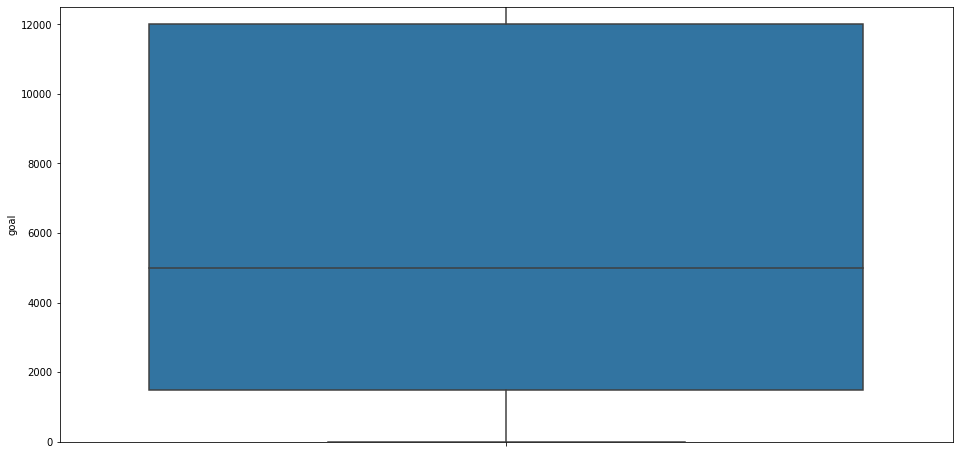

In [283]:
# print(training_data['goal'])

sns.boxplot(y=training_data.goal)
plt.ylim(0,12500)

outliers_funded = 0
outliers = 0
for index, entry in enumerate(training_data['goal']):
    if entry < 500:
        outliers += 1
        if funded_binary[index] == 1:
            outliers_funded += 1
            
        
training_data['goal_per'] = 0.00
for index, entry in enumerate(training_data['goal']):
    if entry > 10000:
        training_data.loc[index, 'goal_per'] = 0.25
    else:
        training_data.loc[index, 'goal_per'] = 1 - (entry / 10000)
        
print(*training_data['goal_per'])
            
print("No. of outliers: ", outliers)
print("No. of funded outliers: ", outliers_funded)
# ay.ticklabel_format(useOffset=False)
# # print(days_until_deadline)


# fig, ax = plt.subplots(1, 1)
# boxplot = sns.boxplot(y=training_data.goal, ax=ax)
# labels = ['%.5f' % float(t.get_text()) for t in ax.get_xticklabels()]
# ax.set_xticklabels(labels)

In [284]:
################################################ MAKE YOUR OWN ATTRIBUTES ####################################################

# 4. DAYS_UNTIL_DEADLINE = DEADLINE - LAUNCHED_AT:

# calculates how many days a project has from launching to deadline

time_until_deadline = [0 for x in range(92)]
time_until_deadline_funded = [0 for x in range(92)]

# to add them in dataset:
days_until_deadline = []

for i in range(len(training_data)):
    aux = (int)((training_data.iloc[i].deadline - training_data.iloc[i].launched_at)/60/60/24)
    time_until_deadline[aux] += 1
    days_until_deadline.append(aux)
    if(training_data.iloc[i].funded == True):
        time_until_deadline_funded[aux] += 1
    
print(time_until_deadline)

[0, 47, 33, 74, 74, 135, 152, 512, 186, 216, 669, 226, 256, 363, 1406, 1446, 456, 441, 490, 516, 1976, 1972, 745, 697, 802, 1688, 716, 977, 1780, 5735, 40531, 2991, 1658, 1395, 1179, 2357, 815, 674, 527, 718, 2358, 453, 508, 422, 964, 3982, 481, 301, 257, 320, 624, 236, 209, 207, 196, 241, 204, 212, 305, 1957, 6226, 139, 54, 48, 27, 60, 52, 21, 26, 23, 54, 32, 31, 24, 19, 48, 18, 21, 16, 19, 35, 14, 18, 15, 23, 18, 33, 28, 62, 385, 322, 21]


In [135]:
# sees number of occurances of these days
# 1 day apare de 47 ori, 2 days apare de 33 ori, ...

print(time_until_deadline_funded)

[0, 3, 0, 4, 9, 8, 18, 29, 19, 15, 23, 24, 17, 25, 90, 68, 24, 33, 23, 28, 112, 97, 43, 36, 40, 81, 32, 32, 71, 167, 1146, 117, 56, 40, 35, 53, 32, 16, 20, 22, 63, 18, 20, 13, 21, 97, 27, 15, 7, 14, 17, 7, 7, 5, 10, 11, 3, 6, 12, 39, 124, 14, 4, 0, 0, 3, 6, 1, 0, 1, 1, 0, 2, 0, 2, 6, 3, 1, 2, 1, 3, 0, 2, 0, 2, 1, 2, 4, 6, 19, 14, 0]


In [136]:
# in percentage:

for i in range(92):
    if (i != 0):
        if time_until_deadline[i] != 0 :
            time_until_deadline_funded[i] = (int)((time_until_deadline_funded[i] * 100) / time_until_deadline[i])
        else:
            time_until_deadline_funded[i] = 0
    
print(time_until_deadline_funded)

[0, 50, 0, 44, 90, 53, 69, 70, 73, 75, 50, 68, 58, 67, 72, 63, 64, 73, 67, 62, 70, 70, 76, 69, 62, 67, 71, 60, 65, 48, 49, 71, 66, 63, 66, 50, 80, 61, 48, 70, 53, 62, 74, 68, 55, 49, 67, 68, 50, 58, 45, 43, 50, 41, 76, 61, 25, 54, 52, 39, 38, 93, 100, 0, 0, 100, 85, 100, 0, 50, 100, 0, 100, 0, 100, 100, 100, 100, 66, 100, 100, 0, 100, 0, 66, 100, 66, 80, 75, 79, 63, 0]


33.62429
Low outliers number: 9674
Low outliers but funded number: 6415
Up outliers number: 19050
Up outliers but funded number: 9836
Mijloc outliers number: 71276
Mijloc outliers but funded number: 42203
0        0.511628
1        0.069767
2        0.150000
3        0.511628
4        0.302326
5        0.186047
6        0.744186
7        0.255814
8        0.150000
9        0.302326
10       0.558140
11       0.511628
12       0.418605
13       0.255814
14       0.302326
15       0.069767
16       0.302326
17       0.976744
18       0.674419
19       0.325581
20       0.325581
21       0.395349
22       0.069767
23       0.279070
24       0.046512
25       0.150000
26       0.348837
27       0.534884
28       0.209302
29       0.325581
           ...   
99970    0.302326
99971    0.302326
99972    0.023256
99973    0.906977
99974    0.302326
99975    0.302326
99976    0.302326
99977    0.069767
99978    0.348837
99979    0.348837
99980    0.302326
99981    0.302326
99982    0.348837
999

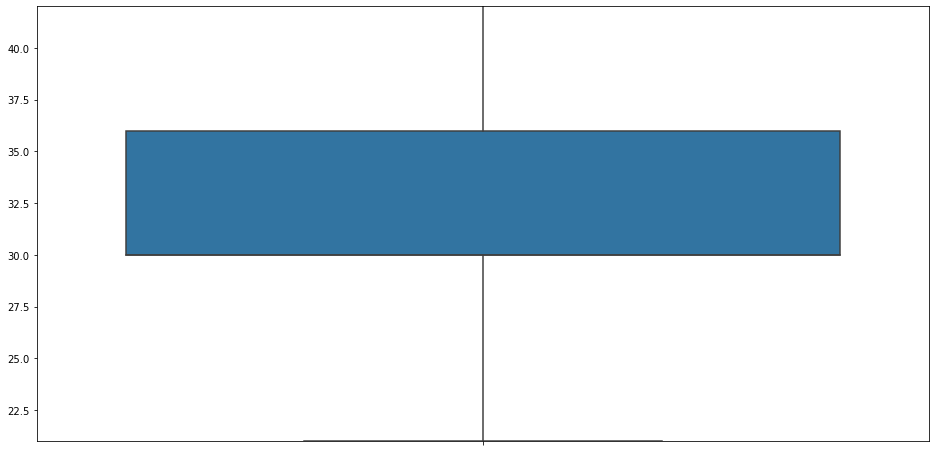

In [285]:
sns.boxplot(y=days_until_deadline)
# print(days_until_deadline)
plt.ylim(21,42)

outliers_low = 0
outliers_low_funded = 0
outliers_up = 0
outliers_up_funded = 0
outliers_m = 0
outliers_m_funded = 0
for index, entry in enumerate(training_data['funded_binary']):
    if days_until_deadline[index] <21:
        outliers_low += 1
        if entry == 1:
            outliers_low_funded += 1
    if days_until_deadline[index] > 42:
        outliers_up += 1
        if entry == 1:
            outliers_up_funded += 1
    if days_until_deadline[index] >= 21 and days_until_deadline[index] <= 42:
        outliers_m += 1
        if entry == 1:
            outliers_m_funded += 1
            
            
print(statistics.mean(days_until_deadline))           
print("Low outliers number:", outliers_low)
print("Low outliers but funded number:", outliers_low_funded)
print("Up outliers number:", outliers_up)
print("Up outliers but funded number:", outliers_up_funded)
print("Mijloc outliers number:", outliers_m)
print("Mijloc outliers but funded number:", outliers_m_funded)
# sns.distplot(days_until_deadline)


training_data['time_until_deadline'] = 0.000

for index, entry in enumerate(training_data['time_until_deadline']):
    if days_until_deadline[index] > 43:
        training_data.loc[index, 'time_until_deadline'] = 0.15
    else:
        training_data.loc[index, 'time_until_deadline'] = 1 - (days_until_deadline[index] / 43)
    
print(training_data['time_until_deadline'])

# count1 = 0
# count2 = 0
# for index, entry in enumerate(training_data['funded']):
#     if money_each_day[index] > 400:
#         count1 += 1
#         if(entry == "1"):
#             count2 += 1
        
# print(count1)
# print(count2)


In [286]:
training_data['days_until_deadline'] = days_until_deadline
# -------> THIS IS THE SHIT, creezi o noua coloana si egalezi cu o lista creata mai sus!

In [287]:
# 5. MONEY_PER_DAY_FUNDED

money_per_day = [0 for x in range(10)]
money_per_day_funded = [0 for x in range(10)]

money_each_day = []

for i in range(len(training_data)):
    aux = (int)((training_data.iloc[i].deadline - training_data.iloc[i].launched_at)/60/60/24)
    money = (int)(training_data.iloc[i].goal / aux)
    money_each_day.append(round(money))
    if(money < 10):
        money_per_day[0] += 1
        if(training_data.iloc[i].funded == True):
            money_per_day_funded[0] += 1
    if money in range(10, 25):
        money_per_day[1] += 1
        if(training_data.iloc[i].funded == True):
            money_per_day_funded[1] += 1
    if money in range(25, 50):
        money_per_day[2] += 1
        if(training_data.iloc[i].funded == True):
            money_per_day_funded[2] += 1
    if money in range(50, 100):
        money_per_day[3] += 1
        if(training_data.iloc[i].funded == True):
            money_per_day_funded[3] += 1
    if money in range(100, 250):
        money_per_day[4] += 1
        if(training_data.iloc[i].funded == True):
            money_per_day_funded[4] += 1
    if money in range(250, 500):
        money_per_day[5] += 1
        if(training_data.iloc[i].funded == True):
            money_per_day_funded[5] += 1
    if money in range(500, 1000):
        money_per_day[6] += 1
        if(training_data.iloc[i].funded == True):
            money_per_day_funded[6] += 1
    if money in range(1000, 5000):
        money_per_day[7] += 1
        if(training_data.iloc[i].funded == True):
            money_per_day_funded[7] += 1
    if money in range(5000, 10000):
        money_per_day[8] += 1
        if(training_data.iloc[i].funded == True):
            money_per_day_funded[8] += 1
    if(money not in range(0, 10000)):
        money_per_day[9] += 1
        if(training_data.iloc[i].funded == True):
            money_per_day_funded[9] += 1
        
print(money_per_day)
print(money_per_day_funded)

[4323, 8366, 10623, 15532, 25256, 14342, 10502, 9167, 1011, 878]
[2954, 5789, 7393, 10205, 15679, 8043, 4948, 3170, 190, 83]


In [175]:
# prediction money/day

for i in range(len(money_per_day)):
    money_per_day_funded[i] = (int)((money_per_day_funded[i] * 100) / money_per_day[i])
    
print(money_each_day)

[133, 112, 83, 309, 500, 17, 181, 312, 62, 166, 76, 214, 20, 181, 4, 62, 186, 180, 285, 103, 86, 38, 37, 96, 182, 42, 35, 125, 176, 20, 153, 8, 37, 15, 29, 20, 57, 103, 14, 172, 8, 133, 86, 50, 91, 156, 133, 74, 75, 181, 258, 26, 83, 131, 66, 25, 222, 8, 66, 166, 152, 192, 16, 293, 94, 58, 46, 72, 30, 187, 66, 70, 81, 66, 133, 42, 285, 50, 500, 145, 57, 93, 66, 125, 23, 68, 74, 0, 216, 100, 33, 23, 166, 3, 40, 166, 84, 96, 49, 23, 10, 83, 111, 41, 33, 155, 111, 23, 208, 80, 16, 25, 66, 1, 22, 121, 34, 250, 52, 155, 166, 156, 166, 166, 26, 25, 200, 57, 35, 33, 64, 28, 26, 338, 28, 133, 44, 23, 123, 16, 16, 16, 250, 20, 106, 216, 41, 26, 400, 155, 50, 166, 12, 161, 150, 42, 230, 50, 117, 78, 44, 81, 100, 12, 52, 111, 33, 76, 40, 62, 0, 15, 8, 166, 204, 60, 666, 108, 366, 200, 42, 1, 100, 72, 8, 104, 106, 10, 20, 228, 200, 166, 178, 5, 22, 33, 206, 116, 61, 75, 16, 75, 41, 66, 33, 394, 109, 104, 33, 177, 16, 11, 135, 31, 35, 500, 116, 166, 52, 166, 166, 166, 179, 56, 16, 549, 125, 60, 285

75952
48627


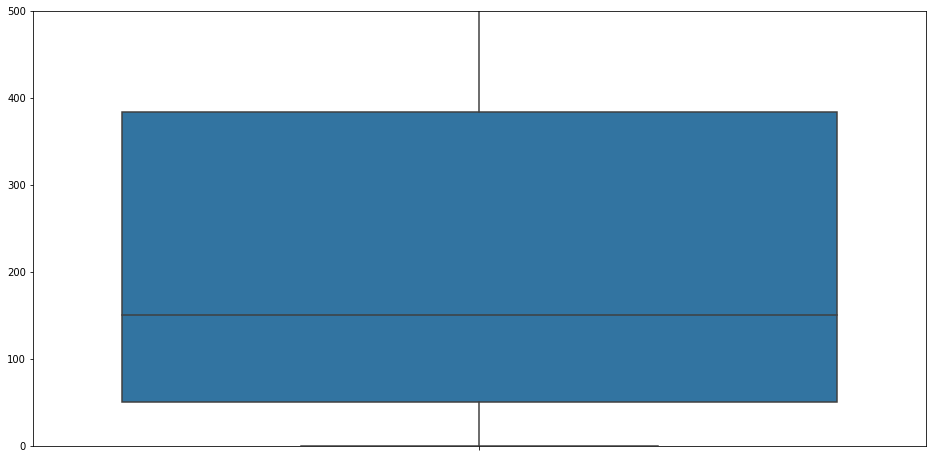

In [288]:
# import statistics


sns.boxplot(y=money_each_day)
plt.ylim(0, 500)


count1 = 0
count2 = 0
for index, entry in enumerate(training_data['funded_binary']):
    if money_each_day[index] <= 400:
        count1 += 1
        if(entry == 1):
            count2 += 1
        
print(count1)
print(count2)

for index, entry in enumerate(money_each_day):
    if entry > 600:
        money_each_day[index] = 0.1
    elif entry > 400:
        money_each_day[index] = 0.2
    else:
        money_each_day[index] = 1 - (money_each_day[index] / 400) + 0.2
        
# # print(second_sum / 5006)
# print(money_each_day)
#

In [289]:
# training_data['money_per_day'] = 0
training_data['money_per_day'] = money_each_day

print(training_data.money_per_day[0])

0.8674999999999999


In [290]:
# 6. BLURB LENGTH

#blurb_length: cor with funded: #0.032002518832337956
training_data['blurb'].astype(str)
blurb_length = []
for i in range(len(training_data)):
    if training_data.iloc[i].blurb != training_data.iloc[i].blurb:
        blurb_length.append(0)
    else:
        blurb_length.append(len(training_data.iloc[i].blurb))  
training_data['blurb_length'] = blurb_length

In [291]:
# 7. NAME LENGTH

#name_length: #0.12593483192454363
training_data['name_length'] = training_data['name']
name_length = []
for i in range(len(training_data)):
    if training_data.iloc[i].name_length != training_data.iloc[i].name_length:
        name_length.append(0)
    else:
        name_length.append(len(training_data.iloc[i].name_length))   
training_data['name_length'] = name_length

In [296]:
################################################# MAKE DUMMIES ###############################################################

# category_dummy = pd.get_dummies(training_data.category)

# training_data['category_dummy'] = category_dummy

training_data = pd.get_dummies(training_data, columns = ['category'])

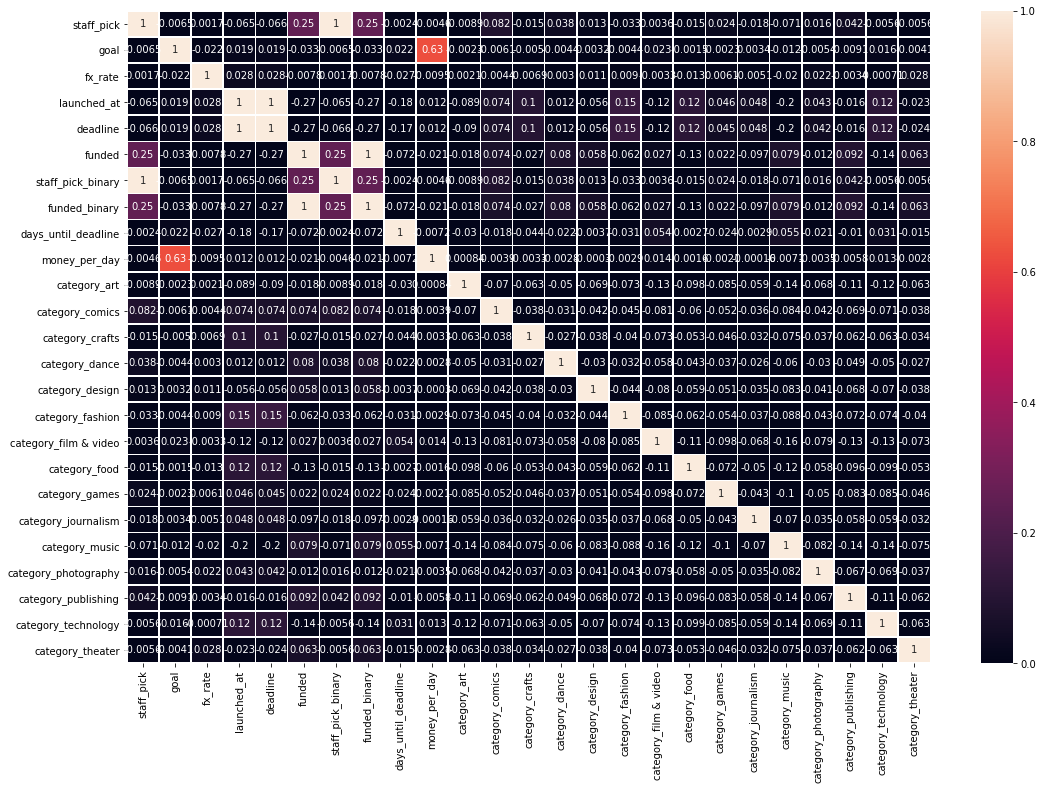

In [18]:
# Heatmaps are perfect for exploring the correlation of features in a dataset.

# First, get the correlation matrix:

correlation_matrix = training_data.corr()

# category_funded = training_data.pivot("category", "funded")

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(correlation_matrix, annot = True, linewidths = .5, ax = ax, vmin = 0, vmax = 1)

In [297]:
################################## MY ATTEMPT INTO TRYING MULTIPLE LINEAR REGRESSION ##########################################

X = pd.DataFrame(np.c_[training_data['staff_pick_binary'], training_data['money_per_day'], 
                       training_data['goal_per'], 
                       training_data['blurb_length'], training_data['name_length'], training_data['category_art'], 
                       training_data['category_comics'], training_data['category_crafts'], training_data['category_dance'], 
                       training_data['category_design'], training_data['category_fashion'], training_data['category_film & video'],
                       training_data['category_food'], training_data['category_games'], training_data['category_journalism'], 
                       training_data['category_music'], training_data['category_photography'], training_data['category_publishing'], 
                       training_data['category_technology'], training_data['category_theater']],  
                 columns = ['staff_pick_binary', 'money_per_day', 'goal_per', 
                            'blurb_length', 'name_length', 'category_art', 'category_comics', 
                     'category_crafts', 'category_dance', 'category_design', 'category_fashion', 'category_film & video', 
                     'category_food', 'category_games', 'category_journalism', 'category_music', 'category_photography', 
                     'category_publishing', 'category_technology', 'category_theater', ])
Y = training_data['funded_binary']


# training_data['days_until_deadline'] or training_data['time_until_deadline']

In [298]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 9)

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_Train, Y_Train)

# make predictions:
pred = lin_reg_mod.predict(X_Test)



# lin_reg_mod = LinearRegression()
# X_folds = np.array_split(X, 2)
# Y_folds = np.array_split(Y, 2)

# scores = list()

# for k in range(2):
#     X_Train = list(X_folds)
#     X_Test = X_Train.pop(k)
#     X_Train = np.concatenate(X_Train)
#     Y_Train = list(Y_folds)
#     Y_Test = Y_Train.pop(k)
#     Y_Train = np.concatenate(Y_Train)
    
#     scores.append(lin_reg_mod.fit(X_Train, Y_Train).score(X_Test, Y_Test))
    
# lin_reg_mod.fit(X_Train, Y_Train)
# pred = lin_reg_mod.predict(X_Test)



print(*pred)

# NOW, test predicted values in comparison with the actual values in the
# validation set by comparing two metric: RMSE and R-2

0.8038867384470947 0.5684927762812955 0.7903806624869234 0.45117714571113804 0.5561917211126521 0.2951926171534674 0.4872009475237993 0.4804152027313553 0.6235985472126733 0.812741526367929 0.4112135176830152 0.7545656115313619 1.1203167036363098 0.41592847962988755 0.7164050856859357 0.5319733194371209 0.7719223331274156 0.9076530202436018 0.6916047413425113 1.0098877509453357 0.6624278463414595 0.5664526712780493 0.6540168191909084 1.0882038374532184 0.6643401346419558 0.8130714514074179 0.48434319075423415 0.31760398301649034 0.6895600438490423 0.6957259169156267 0.676102589415672 0.7411055505899371 0.26507158635245687 0.5235592656698276 0.23098058609225114 0.5670228668129653 0.42395206877386027 0.28049603995359607 0.5972730346272594 0.4148441697238601 0.3854214368999238 0.5342679835475235 0.4267570666949695 0.6569593447296455 0.8291030965137272 0.6467429406977852 0.5855040796750649 0.6355790232114856 0.6920614810294594 0.6041540383440602 0.7230474619102202 0.7740577983274171 0.6068

0.7865911272575309 0.3099516002617513 0.4952559487859665 0.9257250639471616 0.6809048431611298 0.6959077273461378 0.8986370544139639 0.5938200772118395 0.2858582234766129 0.6687595330626954 0.830019917224862 0.6895062741263046 0.3778890891939668 0.6329404817380547 0.705044509735743 0.382851824995302 0.5553396400771744 0.4701294845371836 0.283213551219924 0.6361518804008179 1.0454275808649607 0.6796298265348045 0.756571693507982 0.7163286129829477 1.1219151491635875 0.6093677035891116 0.5421716964157401 0.6510421082628828 0.2588171847655843 0.5713582056294144 0.8196818900277474 0.24016703946010942 0.17633896241321367 0.4734927142517052 0.43633383529867165 0.5715642851999473 0.6632108584795207 0.40433578063048903 0.4936810868446311 0.618475721160992 0.6917754631911215 0.21754400470730245 0.2943793558522949 1.0001224541420273 0.52654658654911 0.4973442649520431 0.7306070932760218 0.3680039556339916 0.6611726824725164 1.0321613838809118 0.416038996352161 0.7467991649715958 0.63503800666791

0.49733133865739004 0.6338602744314026 0.17052204339100452 0.7206367126369179 0.3163224564237864 0.484575477607302 0.5324142153477107 0.6141309447920591 0.644336213803661 0.7310246033016577 0.24536993156253767 0.39312819848959923 0.5572057057698756 0.7738097689551591 1.0700007112875571 0.41045365189077143 0.6806440444610228 0.5028654619400725 0.58289835462386 1.017911325559246 0.9406971738195331 0.6963882859379648 0.4078189999452897 0.5940979197561338 0.6460955592168307 0.13454094195964209 0.5446412447769993 0.606115221891732 0.37235237727570636 0.4452967553186903 0.680387983500567 0.3792866635658787 0.916683441648272 0.9672583696311119 0.2855988124937645 0.71588903204197 0.9271458159590332 0.6861769493022536 0.30422017469283574 0.6413530874307892 0.7563623650809684 0.5375674641359101 0.5474199171439902 0.7235798138048014 0.3576780158852534 0.627715880812741 0.3420018329501311 0.23175135549797135 0.712286740591018 0.375328400590457 0.5615151530748003 0.5127067922485666 0.50203881817955

0.23294425981456718 0.6251175166692056 0.5524365128596664 0.6105679994134956 0.49836701506414627 0.6826538972921723 0.43910764248569795 0.6973844055351869 1.0575915226315007 0.321054491955295 0.7801228947373642 0.6249854559344279 0.8128558945279726 1.0686982032803907 0.6504384126906502 0.923296410049006 0.29527235379449185 0.5743896803682591 0.6841007925317384 0.619193013319951 0.28416687654468475 0.9610564374225664 0.33770530988547903 0.34648661586146823 0.5758697219426623 0.3493218852256905 0.8674883063276022 0.6760108381656535 0.579505119892831 1.1788565509324722 0.45442949381369685 0.6906657489113581 0.44884743008716366 0.515527597368343 0.7182763774462684 0.5023168916192539 0.19911686006289098 0.17253170895614509 0.7839232847304851 0.7909068907031945 0.25960264154178114 0.5156926032838528 0.6293236543220934 0.6001681506936527 0.5955976720243139 0.6278924983801775 0.3594344194012631 0.5911385529640165 1.0614136240270138 0.5496481242469142 0.8763236735918699 0.6294373727844605 0.342

0.18641566972979415 0.6017809104119298 0.5485689973118544 0.27223686964649485 0.6336381708745034 0.7734824937746384 0.5170884921937935 0.5627426515626376 0.4654966674137948 0.2898659351667407 1.0683439538255937 0.5398672121067063 0.6112532597234039 0.7021318493553987 0.40020197913068845 0.4937080444817715 0.45424707794211117 0.5457398901382772 0.19540009863249125 0.3564856010200783 0.6383302441336663 1.1236420275021952 0.4324456262272034 0.29571603767974597 0.9072653987469905 0.15911616889755692 0.49094062615871065 0.33183465563495224 0.3665798718435523 0.20900203679671 0.34898553080728273 0.5829685722081779 0.5579051691262156 0.6339209567251389 0.708046122527606 0.5190828339616529 0.7880078222228046 0.5226047266187537 0.5160700894921775 0.21448566897786236 0.5774115209309341 0.3087953073402756 0.6115215059224419 0.3480718058835643 0.3672400265210959 0.7442688038334879 0.6935939998610086 0.6096772194933655 0.6353129908540084 0.810374543463365 0.5301492647751834 1.020026108575726 0.7051

 0.5972683100134626 0.6213685824646538 0.968235026204585 0.2967056169812641 0.6178282092120411 0.7218105247847202 0.25491428383324444 0.6796299687694388 0.41269781041264775 0.22714266879736106 0.19994351813547262 0.31614359594021124 0.4205756216550141 0.5314280068355729 0.5628728866893208 0.7030458247938688 0.7455047851103764 0.6748885626797175 0.8413684416718733 0.6052684612756477 0.4551537891907046 0.5613753130646886 0.6487403678380568 0.8109688298021398 0.8035967251701761 0.7104253793587058 0.7062001079518738 0.4852176493467166 0.38909626192362384 0.5224962033468431 0.1965262068319087 0.1397846695417554 0.30681030674895887 0.44207147153712834 0.6072887707270069 0.48377319920306194 0.5242417789539753 0.70209077040244 0.5320084757682746 0.35532433764062266 0.5374942717284746 0.6014199670212029 0.5161462383755784 0.25890868741853307 0.6438103027688813 0.4123980246748432 0.8109158234030278 0.41006422262738507 0.9020230568439338 0.33846685195001847 0.6467518562538621 0.648742349579344 0.

0.28992132124921804 0.6870921312895859 0.5415159102190062 0.764034105328186 0.6635006268770204 0.5876061169728356 0.4121170949921945 0.6863370478587326 0.7257384987643125 0.7412192562600786 0.5870866670632574 1.0021992351698956 0.7197557694343963 0.5988502195117066 0.787762971377241 0.7665334657988827 0.636139344827541 0.14831834780770298 0.27586526261998834 0.58414760867303 0.6084576266650166 1.11262535289001 0.463042052787921 0.9677480465384258 0.4317594840567438 0.5277708675883155 0.6374752731578291 0.500878060418436 0.585642362115222 0.6042529470419415 0.6683108469775179 0.44066935417332176 0.16402145419001107 0.4730329363614591 0.6935938338057196 0.6867996662512189 0.4859649858608567 0.7695973386902177 0.6050023301032756 0.7112794950013259 0.5153795675411519 0.9942493717319275 0.6521817413785649 0.46525357464468453 0.6642350442627958 0.622945499512995 0.3161152755954858 0.4050315268318688 0.555675751206234 1.1132444989713064 0.39300895501077493 0.3085052070720036 0.622363420064999

0.41221326625058624 0.6145780452815057 0.5990310102059739 0.5208311710178601 0.7126013588286515 0.5010186702251768 1.088580305690224 0.2212355570175477 0.8610784490218885 0.8344524010085174 0.5933119781652261 0.6421363569592438 0.3059862934209989 0.7139545977698711 1.088686594850703 0.5938009301449843 0.5874113776757227 0.5710550285460425 0.3800784742979594 0.7513477200280605 0.6025498474815467 0.32723188568288164 0.2806623843876746 0.18125253735031271 0.9317441727278977 0.7258345312312419 0.6656990867099765 0.6226387414906484 0.714153296535607 0.6119706534437294 0.2568639159092011 0.7659573273469518 0.24120867802138635 1.0990975727227594 0.2901938547482039 0.6713868005908206 0.8163169528329789 0.5282061171711009 0.34429135473196926 0.5299683279121915 0.5885419150104869 0.6942231789087676 0.3089783126461732 0.487173843975872 0.5422288872372765 0.832041898760308 1.0346923139687763 0.6987400823640374 0.6081843177167342 0.8695291196050822 0.6797921710768815 0.6750698028127209 0.3781893397

 0.8168954366681374 0.36393307934571484 1.004564921663273 0.3693577876525518 0.9428634904735658 0.4141126686066765 0.7644708212812066 0.5392640831540683 0.38947899982196427 0.783016244002894 0.604762248177109 0.5001649645853868 0.5363520087641611 0.707780272153491 0.4055473443355282 0.3823495521720284 0.39111298983533815 0.3996529632129957 0.5021002959997587 0.4838014311771563 0.874212297366275 0.7039906951194617 0.39420542463084324 0.5721616884646351 0.5477519234621218 0.47067744886921 0.6459125539109332 0.7056776245844629 0.23939467220825475 0.7624537157257429 0.3622596014566994 0.7698191220628705 0.5336420958393595 0.25354928166106794 0.8297025599240213 0.25624572760306485 0.6603629929221335 1.2090177935096407 0.6993203537733658 0.9555211669245111 0.5491702440528217 0.8109578959911682 0.8852074864953701 0.4838902873296138 0.6927987945836932 0.5414482039830772 0.5137150318823098 0.6128174345581485 0.7912880581008167 0.4643384490570526 0.341784268312889 0.3627285149074198 0.2264688797

0.8998572225771129 0.7296237099687624 0.7222532434809961 0.35349038374001784 0.5097641573781064 0.6403628468787936 0.7002710392833782 0.23376127966680244 0.4774765818513599 0.6056274183243305 0.6500070532396979 0.7000773344448222 1.1429937413027995 0.6795664268252033 0.5984694879956131 0.5051604093589773 0.6464973344336314 0.5068626996587551 0.5355432536136768 0.6486061229746799 0.5911280351148586 0.14652000789318548 0.5803544063015489 0.33072852666658115 0.7898443457055423 0.758057265475441 1.0408187859861624 0.7225363413009294 0.4791306737321952 1.0635850124149475 0.23046328331901683 0.7398265553089074 0.1471046377969656 0.7373852218571725 0.35473107965363554 1.010322963557706 0.9538847750479137 0.5388330496729091 0.434875329764321 0.7096031261648589 0.4703080527024111 0.1793912737312624 0.3899949549335056 0.9443505755237755 0.43643204236532984 0.18551730407212527 0.3521425024239222 0.5159745796072677 0.5125769184453057 0.8009873125372526 0.37228789712808724 0.5304642333177011 0.6872

 0.6231310709427803 0.7897259945813153 0.8315022062992348 0.9506284660403832 0.8572301245880217 0.5336463779442764 0.4392785388188065 0.8481654431838508 0.16899481863560045 0.5438047205423123 0.21591799828058467 0.5764243131501438 0.6588044009534281 0.19649813046787679 0.5240248534942091 0.2928176929991211 0.5095739264836403 0.8833800261617326 0.6653693921993139 0.5413976506854093 0.641549703817496 0.30175764326965776 0.5247413989258537 0.5799516392311735 0.37916364251331824 0.4798619673689264 0.7892178257077362 0.34422884379119023 0.5261730520387371 0.46310490183758546 0.26107303794484576 0.5512208537620291 0.4288370720256194 0.9068732289843664 0.7038857576510796 0.6933859053479965 0.6838397266633507 0.5228986338089942 0.3364249608175271 0.39712260207488786 0.7920975039466829 0.7279457908640201 0.5612134762758441 0.7190284376181153 0.2163290158255725 0.6634226282909657 0.8671381472276612 0.5333587997530882 0.5054412098535161 0.46552801534398486 0.5050425029139444 0.40162101234625397 0

0.5780243867330623 0.3800155760032375 0.5202514259267564 0.4000435295923366 0.4229922446370699 0.4564337512696629 0.6628955739570505 0.681464462422277 0.7565509754890403 0.6890110543374699 0.7237162914041703 0.4572969171495288 1.1692710518816711 0.41707044447892794 0.12828654037276954 0.20296655129475644 0.44685637343561824 0.45141665279667503 0.6711507568821865 0.6582285650206403 0.736318339593298 0.22062338176310312 1.015763574538207 0.6042109778786369 0.4881111628250799 0.5459493588715234 0.5712341363395039 0.6606637890854322 0.46349081684231713 0.8020836023789046 0.5894005501389687 0.47751443163357465 0.7630791394851877 0.4851660420821293 0.6126103056874693 0.2454448862901239 0.5325769947630123 0.6815661276530037 0.5515954924570313 0.4599711167091433 0.4774317466593676 0.7523507868381272 0.7907631287442508 0.3277054100018046 0.9032809693833594 0.1767091178473313 0.8829225429892764 0.37916364251331824 0.5232442982425908 0.5169794064155824 0.2746720727607523 0.43105064080232186 0.586

0.6992912828853274 0.6473027614705893 0.5921920575040474 1.1522614079107774 0.7719491597106491 0.5421211926190601 0.887376507402855 0.5065452517446656 0.8777488181892952 0.7358622984802075 0.6438663967225446 0.5571722050876019 0.33152944717219907 0.9543220295205374 0.6797999885570531 0.7783989001754346 0.505593545674186 0.39648208350424624 1.185160977947445 0.20801968313667624 0.6062072641637217 0.5954816135927612 0.7559260642443462 0.6462098730350748 0.35745661525272837 0.3063608522811295 0.7239071198626924 0.3012640134344423 0.7554174013678379 0.6596532523882607 0.2657578488893111 1.0408346628983587 0.48465029788111963 0.5768479197318821 0.6416381928292814 0.7113276802152222 0.6195800105638574 0.7413954834658083 0.4495952278209061 0.5144419967836429 0.6498794840181012 0.6884181678171907 0.5033014286008082 0.7561416074369924 0.58766339132273 0.2833924117034991 0.6529754683005918 0.3536314132257703 0.5768277662411472 0.662479067744623 0.7737731472735134 1.0906776674288003 0.76640810743

0.8048078118976608 0.45395610023707744 0.8179635336440323 0.6973848923964749 1.024530690957186 0.7764942072983516 0.7302127452042582 0.7080113152838625 0.6015881068929548 0.6677375697265217 0.14524311557422476 0.8922776210168618 0.6670105649393313 0.8004810335258152 0.8235966402310609 0.6155168161648199 0.6361144799344511 0.6461926008003679 0.5256811548688396 0.7272142536993729 0.8398032326308342 0.3772323824756749 0.7425592518408711 0.37029886483492014 0.5474107540573063 0.4319954875757308 0.8880160227671549 0.5135408314613645 0.48683756849356274 0.6482685378263504 0.7248432542692769 0.1308808358416902 0.63260131909473 0.4813627689501766 0.4066903484624856 0.6158114717105926 0.6698643820822339 0.5692294609850568 0.7343220592010846 0.6205339506834056 0.3818920389072844 0.9228655960557969 0.7618968738046432 0.6556231014649362 0.46860837214510553 0.7434960922641265 0.6837442398311853 0.3948350357511679 0.49879140603027383 0.8299230557652639 0.6133167135090392 0.5751750155594393 0.4905508

In [299]:
import functools

# print(*pred)
# print(Y_Test)

count0 = 0
pred0 = []
pred1 = []
count1 = 0
for index, entry in enumerate(Y_Test):
    if entry == 0:
        pred0.append(pred[index])
        count0 += 1
    else:
        pred1.append(pred[index])
        count1 +=1
    
print(count0)     
print(count1)
# print(len(Y_Test))

print(functools.reduce(lambda x, y: x + y, pred0) / len(pred0))
print(functools.reduce(lambda x, y: x + y, pred1) / len(pred1))

8275
11725
0.47304277108403886
0.6647805572759581


In [300]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

for i in range(len(pred)):
    if(pred[i] >= 0.5):
        pred[i] = 1
    else:
        pred[i] = 0
        
# precision = TP / (TP + FP)
precision = precision_score(Y_Test, pred)*100
print("Precision Score ->", precision)

# recall = TP / (TP + FN)
recall = recall_score(Y_Test, pred)*100
print("Recall Score ->", recall)

f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-measure Score ->", f1_score)

Precision Score -> 72.16791695082215
Recall Score -> 81.22814498933903
F1-measure Score -> 76.43046304469945


In [20]:
# test_set_rmse = (np.sqrt(mean_squared_error(Y_test, pred)))
# test_set_r2 = r2_score(Y_test, pred)

# # Note that for rmse, the lower that value is, the better the fit
# print(test_set_rmse)

# # The closer towards 1, the better the fit
# print(test_set_r2)

print('Variance score: %.2f' % lin_reg_mod.score(X_test, Y_test))
print("Mean squared error: %.2f" % np.mean((lin_reg_mod.predict(X_test) - Y_test) ** 2))

NameError: name 'test_set_rmse' is not defined

In [25]:
count = 0
for i in range(len(Y_test)):
    if(Y_test.iloc[i] != pred[i]):
        count += 1
        
print(count)

7965


# Correctness


In [36]:
def calculate_confusion(pred, answers):
    TP = FP = FN = TN = 0
    
    answers_keys = answers.keys()
    results = [[0 for x in range(2)] for y in range(20000)]


    for x in range(len(answers)):
        index = answers_keys[x]
        results[x] = [pred[x], answers[index]]

    for x in range(len(results)):
        if (results[x][0] == 1):
            if (results[x][1] == 1):
                TP += 1
            else:
                FP += 1
        else:
            if (results[x][1] == 0):
                TN += 1
            else:
                FN += 1
    return [TP, FP, FN, TN]


def accuracy(tp, fp, fn, tn):
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / total

def precision(tp, fp, fn, tn):
    return tp / (tp + fp)

def recall(tp, fp, fn, tn):
    return tp / (tp + fn)

def f1_score(tp, fp, fn, tn):
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)
    return 2 * p * r / (p + r)

Accuracy: 0.60
Precision: 0.61
Recall: 0.91
F1 score: 0.73


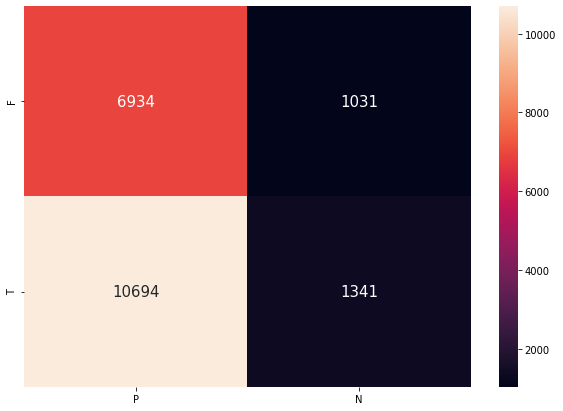

In [39]:
confusion_values = calculate_confusion(pred, Y_test)
TP = confusion_values[0]
FP = confusion_values[1]
FN = confusion_values[2]
TN = confusion_values[3]

values = [[FP, FN], [TP, TN]]
df_cm = pd.DataFrame(values, index = [i for i in "FT"],
                  columns = [i for i in "PN"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g', annot_kws={"size": 15})

print("Accuracy: %.2f" % accuracy(TP,FP,FN,TN))
print("Precision: %.2f" % precision(TP,FP,FN,TN))
print("Recall: %.2f" % recall(TP,FP,FN,TN))
print("F1 score: %.2f" % f1_score(TP,FP,FN,TN))